# Description du projet 

Le projet Kaggle "House Prices - Advanced Regression Techniques" est un concours populaire qui consiste à prédire les prix de vente de maisons dans la ville d'Ames, Iowa, en utilisant diverses techniques de régression. Ce concours offre un excellent point d'entrée pour les praticiens de la science des données afin d'explorer des modèles de régression avancés, de manipuler des données et de comprendre la relation entre différentes caractéristiques des maisons et leurs prix de vente.

$\textbf{Objectif}$

Le but du concours est de prédire les prix de vente des maisons en fonction de 79 caractéristiques fournies, telles que la surface habitable, le nombre de chambres, l'année de construction, le quartier, etc.

# Feature Engineering 

## Nettoyage de la données

In [322]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
data = pd.read_csv("train.csv")
data 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
data = data.drop("Id", axis=1)

In [323]:
def duplicated(data):
    doublon = data.duplicated().any() #vérifie si il y a des doublons , en sortie : True or False
    if doublon == True:
        print("Il y a des doublons dans la base de données")
        nombres_doublons = data.duplicated().sum()
        print("il y a " + str(nombres_doublons) + " doublons \n \n Voici la base de données sans  les doublons :")
        data = data[data.duplicated(keep = False)] #On garde les observations sans doublon
        return data
    else:
        print("Il n'y a pas de doublons dans la base de données \n \n On garde la même base de données ")
        return data 

data = duplicated(data)
data

Il n'y a pas de doublons dans la base de données 
 
 On garde la même base de données 


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

on a supprimé 7 variables qui sont au dessus de 15 % de valeur manquantes
       Variables  % valeurs manquantes
7    GarageYrBlt              5.547945
8     GarageCond              5.547945
9     GarageType              5.547945
10  GarageFinish              5.547945
11    GarageQual              5.547945
..           ...                   ...
76     ExterQual              0.000000
77   Exterior2nd              0.000000
78   Exterior1st              0.000000
79      RoofMatl              0.000000
80     SalePrice              0.000000

[74 rows x 2 columns]


GarageYrBlt GarageCond GarageType GarageFinish GarageQual BsmtFinType2  \
0          2003.0         TA     Attchd          RFn         TA          Unf   
1          1976.0         TA     Attchd          RFn         TA          Unf   
2          2001.0         TA     Attchd          RFn         TA          Unf   
3          1998.0         TA     Detchd          Unf         TA          Unf   
4          2000.0         TA     Attchd          RFn         TA          Unf   
...           ...        ...        ...          ...        ...          ...   
1455       1999.0         TA     Attchd          RFn         TA          Unf   
1456       1978.0         TA     Attchd          Unf         TA          Rec   
1457       1941.0         TA     Attchd          RFn         TA          Unf   
1458       1950.0         TA     Attchd          Unf         TA          Rec   
1459       1965.0         TA     Attchd          Fin         TA          LwQ   

     BsmtExposure BsmtQual BsmtCond BsmtFinType1  ...  BsmtUnfSF BsmtFinSF1  \
0              No       Gd       TA          GLQ  ...        150        706   
1              Gd       Gd       TA          ALQ  ...        284        978   
2              Mn       Gd       TA          GLQ  ...        434        486   
3              No       TA       Gd          ALQ  ...        540        216   
4              Av       Gd       TA          GLQ  ...        490        655   
...           ...      ...      ...          ...  ...        ...        ...   
1455           No       Gd       TA          Unf  ...        953          0   
1456           No       Gd       TA          ALQ  ...        589        790   
1457           No       TA       Gd          GLQ  ...        877        275   
1458           Mn       TA       TA          GLQ  ...          0         49   
1459           No       TA       TA          BLQ  ...        136        830   

      RoofStyle Foundation  ExterCond ExterQual  Exterior2nd  Exterior1st  \
0         Gable      PConc         TA        Gd      VinylSd      VinylSd   
1         Gable     CBlock         TA        TA      MetalSd      MetalSd   
2         Gable      PConc         TA        Gd      VinylSd      VinylSd   
3         Gable     BrkTil         TA        TA      Wd Shng      Wd Sdng   
4         Gable      PConc         TA        Gd      VinylSd      VinylSd   
...         ...        ...        ...       ...          ...          ...   
1455      Gable      PConc         TA        TA      VinylSd      VinylSd   
1456      Gable     CBlock         TA        TA      Plywood      Plywood   
1457      Gable      Stone         Gd        Ex      CmentBd      CemntBd   
1458        Hip     CBlock         TA        TA      MetalSd      MetalSd   
1459      Gable     CBlock         TA        Gd      HdBoard      HdBoard   

      RoofMatl  SalePrice  
0      CompShg     208500  
1      CompShg     181500  
2      CompShg     223500  
3      CompShg     140000  
4      CompShg     250000  
...        ...        ...  
1455   CompShg     175000  
1456   CompShg     210000  
1457   CompShg     266500  
1458   CompShg     142125  
1459   CompShg     147500  

[1460 rows x 74 columns]

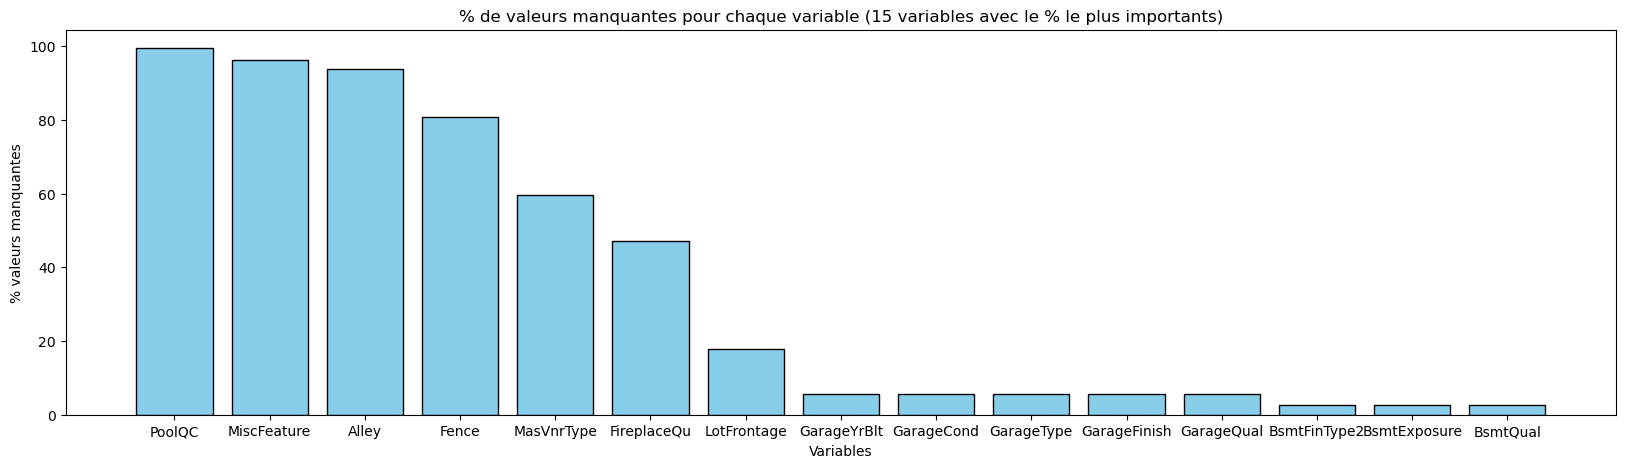

In [324]:
def suppresion_variables_vm(data, seuil):
    
    if data.isna().values.any() == True: #Si on a des valeurs manquantes dans la base de données 
    
        pourcentage = (data.isna().sum() / data.shape[0] * 100).sort_values(ascending = False) #pourcentage de valeurs manquantes pour chaque variables 
        data_pourcentage_vm = pd.DataFrame({"Variables" : pourcentage.index,
                                       "% valeurs manquantes": pourcentage.values })
        plt.figure(figsize=(20, 5))  # Créer une figure avec une taille personnalisée

        # Tracer le graphique en barres
        plt.bar(data_pourcentage_vm['Variables'].iloc[:15], data_pourcentage_vm['% valeurs manquantes'].iloc[:15], color='skyblue', edgecolor='black') #affiche les 15 plus grands % valeur manquantes
        plt.xlabel("Variables")
        plt.ylabel("% valeurs manquantes")
        plt.title("% de valeurs manquantes pour chaque variable (15 variables avec le % le plus importants)") 
        data_pourcentage_vm_selected = data_pourcentage_vm[data_pourcentage_vm["% valeurs manquantes"] < seuil]
        
        print("on a supprimé " + str(data_pourcentage_vm.shape[0] -data_pourcentage_vm_selected.shape[0]) + " variables qui sont au dessus de " + str(seuil) + (" % de valeur manquantes"))
        print(data_pourcentage_vm_selected)
        data = data[list(data_pourcentage_vm_selected ["Variables"])]
        return data
    
    else :
        print("Il n'y a pas de valeur manquante dans la base de données")
        return data 

data  = suppresion_variables_vm(data, 15)
data 

## Traitement variable numérique

In [327]:
def data_numerique(data) : 
    print(data.dtypes.value_counts())
    data_num = data.select_dtypes(include=['number']) #int et float 
    return data_num
data_num = data_numerique(data)

data_num = data_num.drop("SalePrice", axis = 1) #On enleve la variable cible pour le traitement des données
data_num 

object     37
int64      35
float64     2
Name: count, dtype: int64


GarageYrBlt  MasVnrArea    Id  Fireplaces  KitchenAbvGr  BedroomAbvGr  \
0          2003.0       196.0     1           0             1             3   
1          1976.0         0.0     2           1             1             3   
2          2001.0       162.0     3           1             1             3   
3          1998.0         0.0     4           1             1             3   
4          2000.0       350.0     5           1             1             4   
...           ...         ...   ...         ...           ...           ...   
1455       1999.0         0.0  1456           1             1             3   
1456       1978.0       119.0  1457           2             1             3   
1457       1941.0         0.0  1458           2             1             4   
1458       1950.0         0.0  1459           0             1             2   
1459       1965.0         0.0  1460           0             1             3   

      HalfBath  FullBath  BsmtHalfBath  TotRmsAbvGrd  ...  LotArea  \
0            1         2             0             8  ...     8450   
1            0         2             1             6  ...     9600   
2            1         2             0             6  ...    11250   
3            0         1             0             7  ...     9550   
4            1         2             0             9  ...    14260   
...        ...       ...           ...           ...  ...      ...   
1455         1         2             0             7  ...     7917   
1456         0         2             0             7  ...    13175   
1457         0         2             0             9  ...     9042   
1458         0         1             0             5  ...     9717   
1459         1         1             0             6  ...     9937   

      OverallCond  YearRemodAdd  2ndFlrSF  BsmtFinSF2  1stFlrSF  MSSubClass  \
0               5          2003       854           0       856          60   
1               8          1976         0           0      1262          20   
2               5          2002       866           0       920          60   
3               5          1970       756           0       961          70   
4               5          2000      1053           0      1145          60   
...           ...           ...       ...         ...       ...         ...   
1455            5          2000       694           0       953          60   
1456            6          1988         0         163      2073          20   
1457            9          2006      1152           0      1188          70   
1458            6          1996         0        1029      1078          20   
1459            6          1965         0         290      1256          20   

      TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  
0             856        150         706  
1            1262        284         978  
2             920        434         486  
3             756        540         216  
4            1145        490         655  
...           ...        ...         ...  
1455          953        953           0  
1456         1542        589         790  
1457         1152        877         275  
1458         1078          0          49  
1459         1256        136         830  

[1460 rows x 36 columns]

### Valeurs aberrantes

Les valeurs aberrantes peuvent tirer les résultats vers des relations artificiellement fortes ou faibles, ce qui fausse l'interprétation des relations entre les variables. En les supprimant, on obtient des corrélations plus représentatives et fiables.

Cela rendra les relations entre tes variables plus stables et réalistes, car les valeurs extrêmes ne fausseront pas tes calculs.

#### Méthode des quartiles

GarageYrBlt  MasVnrArea  MSSubClass  Fireplaces  KitchenAbvGr  \
0        1.017598    0.514104    0.073375   -0.951226     -0.211454   
1       -0.107927   -0.570750   -0.872563    0.600495     -0.211454   
2        0.934226    0.325915    0.073375    0.600495     -0.211454   
3        0.809167   -0.570750    0.309859    0.600495     -0.211454   
4        0.892540    1.366489    0.073375    0.600495     -0.211454   
...           ...         ...         ...         ...           ...   
1455     0.850854   -0.570750    0.073375    0.600495     -0.211454   
1456    -0.024555    0.087911   -0.872563    2.152216     -0.211454   
1457    -1.566941   -0.570750    0.309859    2.152216     -0.211454   
1458    -1.191766   -0.570750   -0.872563   -0.951226     -0.211454   
1459    -0.566474   -0.570750   -0.872563   -0.951226     -0.211454   

      BedroomAbvGr  HalfBath  FullBath  BsmtHalfBath  TotRmsAbvGrd  ...  \
0         0.163779  1.227585  0.789741     -0.241061      0.912210  ...   
1         0.163779 -0.761621  0.789741      3.948809     -0.318683  ...   
2         0.163779  1.227585  0.789741     -0.241061     -0.318683  ...   
3         0.163779 -0.761621 -1.026041     -0.241061      0.296763  ...   
4         1.390023  1.227585  0.789741     -0.241061      1.527656  ...   
...            ...       ...       ...           ...           ...  ...   
1455      0.163779  1.227585  0.789741     -0.241061      0.296763  ...   
1456      0.163779 -0.761621  0.789741     -0.241061      0.296763  ...   
1457      1.390023 -0.761621  0.789741     -0.241061      1.527656  ...   
1458     -1.062465 -0.761621 -1.026041     -0.241061     -0.934130  ...   
1459      0.163779  1.227585 -1.026041     -0.241061     -0.318683  ...   

      OverallQual  2ndFlrSF   LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0        0.651479  1.161852 -0.207142   1.050994      0.878668    0.575425   
1       -0.071836 -0.795163 -0.091886   0.156734     -0.429577    1.171992   
2        0.651479  1.189351  0.073480   0.984752      0.830215    0.092907   
3        0.651479  0.937276 -0.096897  -1.863632     -0.720298   -0.499274   
4        1.374795  1.617877  0.375148   0.951632      0.733308    0.463568   
...           ...       ...       ...        ...           ...         ...   
1455    -0.071836  0.795198 -0.260560   0.918511      0.733308   -0.973018   
1456    -0.071836 -0.795163  0.266407   0.222975      0.151865    0.759659   
1457     0.651479  1.844744 -0.147810  -1.002492      1.024029   -0.369871   
1458    -0.795151 -0.795163 -0.080160  -0.704406      0.539493   -0.865548   
1459    -0.795151 -0.795163 -0.058112  -0.207594     -0.962566    0.847389   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  
0      -0.288653  -0.944591    -0.459303 -0.793434  
1      -0.288653  -0.641228     0.466465  0.257140  
2      -0.288653  -0.301643    -0.313369 -0.627826  
3      -0.288653  -0.061670    -0.687324 -0.521734  
4      -0.288653  -0.174865     0.199680 -0.045611  
...          ...        ...          ...       ...  
1455   -0.288653   0.873321    -0.238122 -0.542435  
1456    0.722112   0.049262     1.104925  2.355701  
1457   -0.288653   0.701265     0.215641  0.065656  
1458    6.092188  -1.284176     0.046905 -0.218982  
1459    1.509640  -0.976285     0.452784  0.241615  

[1460 rows x 35 columns]

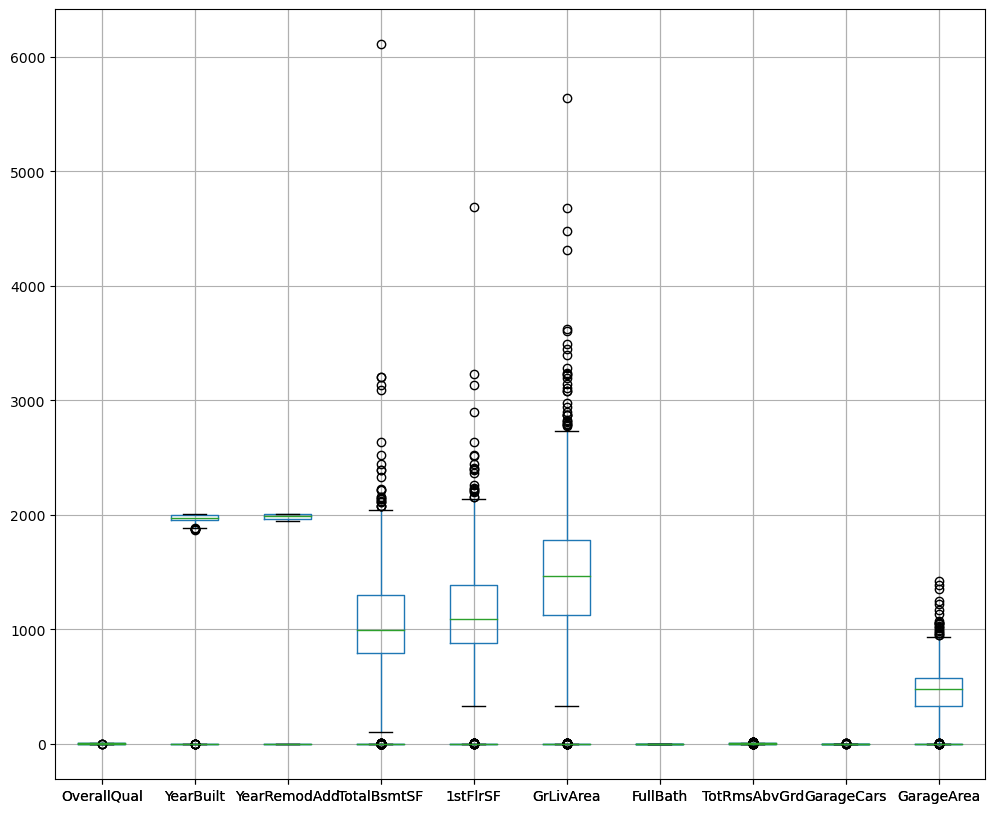

In [21]:
"""""
#Important : regarder si l'écart entre le nombre de lignes avant et après la fonction est grande

def suppression_valeur_aberrante_quartile (data_num, liste_affichage):
    data_num.fillna(data_num.median(), inplace=True) #remplace les valeurs manquantes par la mediane 
    
    data_num[liste_affichage].boxplot(figsize= (12,10))
    
    # Créer une instance de StandardScaler
    scaler = StandardScaler()

    # Appliquer StandardScaler aux données
    scaled_features = scaler.fit_transform(data_num)
    scaled_data_num = pd.DataFrame(scaled_features, columns=data_num.columns)

    scaled_data_num[liste_affichage].boxplot(figsize= (12,10))
    
    # Calculer les quartiles et l'IQR
    Q1 = scaled_data_num.quantile(0.25)
    Q3 = scaled_data_num.quantile(0.75)
    IQR = Q3 - Q1

    # Définir les seuils pour les valeurs aberrantes
    seuil_inf = Q1 - 1.5 * IQR
    seuil_sup = Q3 + 1.5 * IQR

    # Identifier les valeurs aberrantes
    is_outlier = ((scaled_data_num < seuil_inf) | (scaled_data_num > seuil_sup)).any(axis=1)

    # Supprimer les lignes contenant des valeurs aberrantes
    data_sans_aberrantes = scaled_data_num[~is_outlier]
    #data_sans_aberrantes[liste_affichage].boxplot(figsize= (12,10))
    
    
    return scaled_data_num
    
    
    
liste_affichage = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
data_num = suppression_valeur_aberrante_quartile(data_num, liste_affichage)
data_num 

"""""

#### Z_scores : suppression valeurs aberrantes

- Distribution normale et la règle empirique

Dans une distribution gaussienne, la règle empirique, aussi appelée règle des 68-95-99.7, stipule que :

68 % des données se trouvent à moins d'un écart type de la moyenne.
95 % des données se trouvent à moins de deux écarts types de la moyenne.
99,7 % des données se trouvent à moins de trois écarts types de la moyenne.
Cela signifie qu'en utilisant un seuil de Z-score de 3, on capture presque toutes les données d'une distribution normale. Autrement dit, une observation ayant un Z-score supérieur à 3 (ou inférieur à -3) est une valeur rare, ou un outlier potentiel, car elle se situe dans les 0,3 % restants des valeurs les plus extrêmes

- Robustesse contre les valeurs extrêmes
Un Z-score de 3 est souvent utilisé comme un compromis entre :

Capturer des valeurs réellement aberrantes (très éloignées de la majorité des données).
Ne pas être trop strict en rejetant des points qui pourraient simplement être des variations normales dans les données.
En pratique, ce seuil est assez robuste pour détecter les valeurs qui sont anormalement élevées ou basses, sans être trop sensible aux variations normales.

- Hypothèse de normalité

Même si tes données ne suivent pas exactement une distribution normale, le seuil de 3 est souvent utilisé par convention, car de nombreuses distributions sont symétriques et unimodales (une seule "bosse"), et un Z-score de 3 reste efficace pour identifier des valeurs anormales, même dans des distributions légèrement déviées de la normalité.


GarageYrBlt  MasVnrArea        Id  Fireplaces  KitchenAbvGr  \
0        1.017598    0.514104 -1.730865   -0.951226     -0.211454   
2        0.934226    0.325915 -1.726120    0.600495     -0.211454   
4        0.892540    1.366489 -1.721374    0.600495     -0.211454   
6        1.059284    0.458754 -1.716629    0.600495     -0.211454   
10      -0.566474   -0.570750 -1.707138   -0.951226     -0.211454   
...           ...         ...       ...         ...           ...   
1452     1.100970   -0.127953  1.714256   -0.951226     -0.211454   
1453     0.058817   -0.570750  1.716629   -0.951226     -0.211454   
1454     1.059284   -0.570750  1.719002   -0.951226     -0.211454   
1455     0.850854   -0.570750  1.721374    0.600495     -0.211454   
1456    -0.024555    0.087911  1.723747    2.152216     -0.211454   

      BedroomAbvGr  HalfBath  FullBath  BsmtHalfBath  TotRmsAbvGrd  ...  \
0         0.163779  1.227585  0.789741     -0.241061      0.912210  ...   
2         0.163779  1.227585  0.789741     -0.241061     -0.318683  ...   
4         1.390023  1.227585  0.789741     -0.241061      1.527656  ...   
6         0.163779 -0.761621  0.789741     -0.241061      0.296763  ...   
10        0.163779 -0.761621 -1.026041     -0.241061     -0.934130  ...   
...            ...       ...       ...           ...           ...  ...   
1452     -1.062465 -0.761621 -1.026041     -0.241061     -0.934130  ...   
1453      0.163779 -0.761621 -1.026041     -0.241061     -0.318683  ...   
1454     -1.062465 -0.761621  0.789741     -0.241061     -0.318683  ...   
1455      0.163779  1.227585  0.789741     -0.241061      0.296763  ...   
1456      0.163779 -0.761621  0.789741     -0.241061      0.296763  ...   

       LotArea  OverallCond  YearRemodAdd  2ndFlrSF  BsmtFinSF2  1stFlrSF  \
0    -0.207142    -0.517200      0.878668  1.161852   -0.288653 -0.793434   
2     0.073480    -0.517200      0.830215  1.189351   -0.288653 -0.627826   
4     0.375148    -0.517200      0.733308  1.617877   -0.288653 -0.045611   
6    -0.043379    -0.517200      0.975575 -0.795163   -0.288653  1.374993   
10    0.068469    -0.517200     -0.962566 -0.795163   -0.288653 -0.317311   
...        ...          ...           ...       ...         ...       ...   
1452 -0.685702    -0.517200      0.975575 -0.795163   -0.288653 -0.234508   
1453  0.671505    -0.517200      1.024029 -0.795163   -0.288653 -0.058549   
1454 -0.302353    -0.517200      0.975575 -0.795163   -0.288653  0.151048   
1455 -0.260560    -0.517200      0.733308  0.795198   -0.288653 -0.542435   
1456  0.266407     0.381743      0.151865 -0.795163    0.722112  2.355701   

      MSSubClass  TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  
0       0.073375    -0.459303  -0.944591    0.575425  
2       0.073375    -0.313369  -0.301643    0.092907  
4       0.073375     0.199680  -0.174865    0.463568  
6      -0.872563     1.433276  -0.566519    2.029558  
10     -0.872563    -0.039743  -0.980813    1.014077  
...          ...          ...        ...         ...  
1452    2.911188    -1.163889  -1.284176    0.226696  
1453   -0.872563     0.188279   1.296670   -0.973018  
1454   -0.872563     0.372976   0.551847   -0.073781  
1455    0.073375    -0.238122   0.873321   -0.973018  
1456   -0.872563     1.104925   0.049262    0.759659  

[1030 rows x 36 columns]

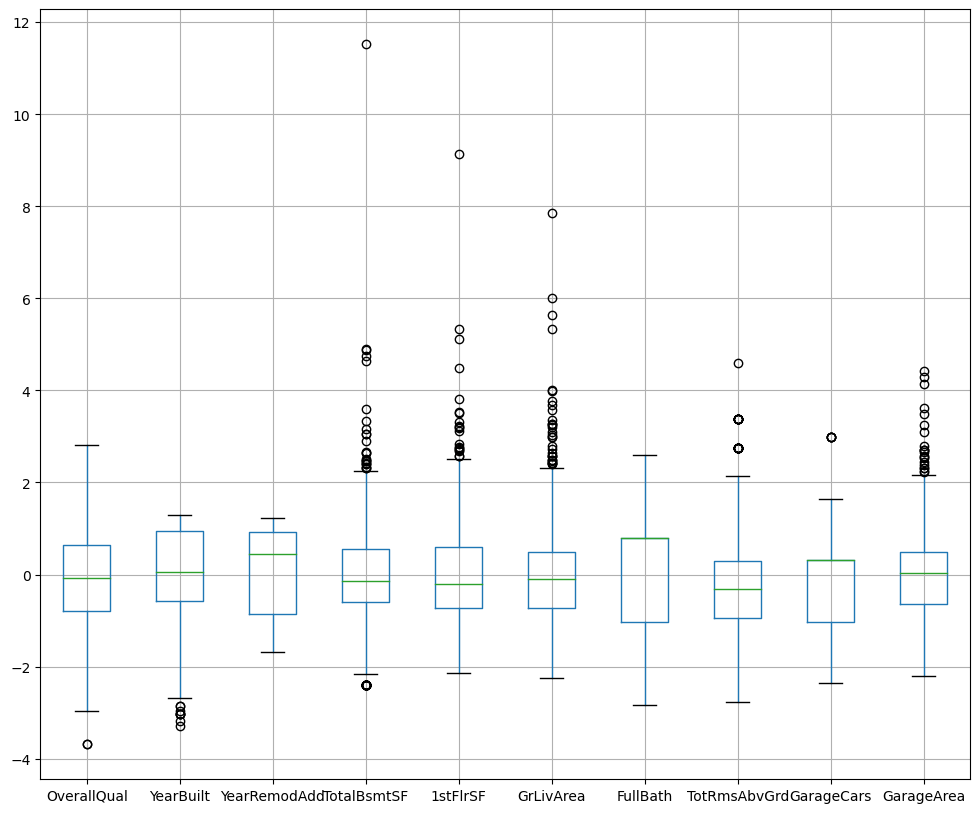

In [328]:
#Important : regarder si l'écart entre le nombre de lignes avant et après la fonction est grande

def suppression_valeur_aberrante_zscores (data_num, liste_affichage):
    data_num.fillna(data_num.median(), inplace=True) #remplace les valeurs manquantes par la mediane 
    
    # Créer une instance de StandardScaler
    scaler = StandardScaler()

    # Appliquer StandardScaler aux données
    scaled_features = scaler.fit_transform(data_num)
    scaled_data_num = pd.DataFrame(scaled_features, columns=data_num.columns)

    scaled_data_num[liste_affichage].boxplot(figsize= (12,10))
    
    # Calculer le z-score pour chaque observation
    z_scores = (scaled_data_num - scaled_data_num.mean()) / scaled_data_num.std()

    # Définir un seuil pour identifier les valeurs aberrantes (par exemple, |z| > 3)
    seuil = 3
    is_outlier = (z_scores.abs() > seuil).any(axis=1)

    # Supprimer les lignes contenant des valeurs aberrantes
    data_sans_aberrantes = scaled_data_num[~is_outlier]
    #data_sans_aberrantes[liste_affichage].boxplot(figsize= (12,10))
    
    
    return data_sans_aberrantes
    
    
    
liste_affichage = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
data_num_scaled = suppression_valeur_aberrante_zscores(data_num, liste_affichage)
data_num_scaled 

$\textbf{Pourquoi centrer et réduire ? }$

Certains algorithmes, comme la régression linéaire, le k-means, le SVM, et les méthodes basées sur la descente de gradient, sont sensibles à l'échelle des variables. Si une variable a une plage de valeurs beaucoup plus grande que les autres, elle pourrait dominer le modèle, même si elle n'est pas la plus importante.

Centrer (soustraire la moyenne) et réduire (diviser par l'écart type) permet d'obtenir des variables avec une moyenne de 0 et un écart type de 1 , garantissant que toutes les variables sont sur la même échelle.

<Axes: >

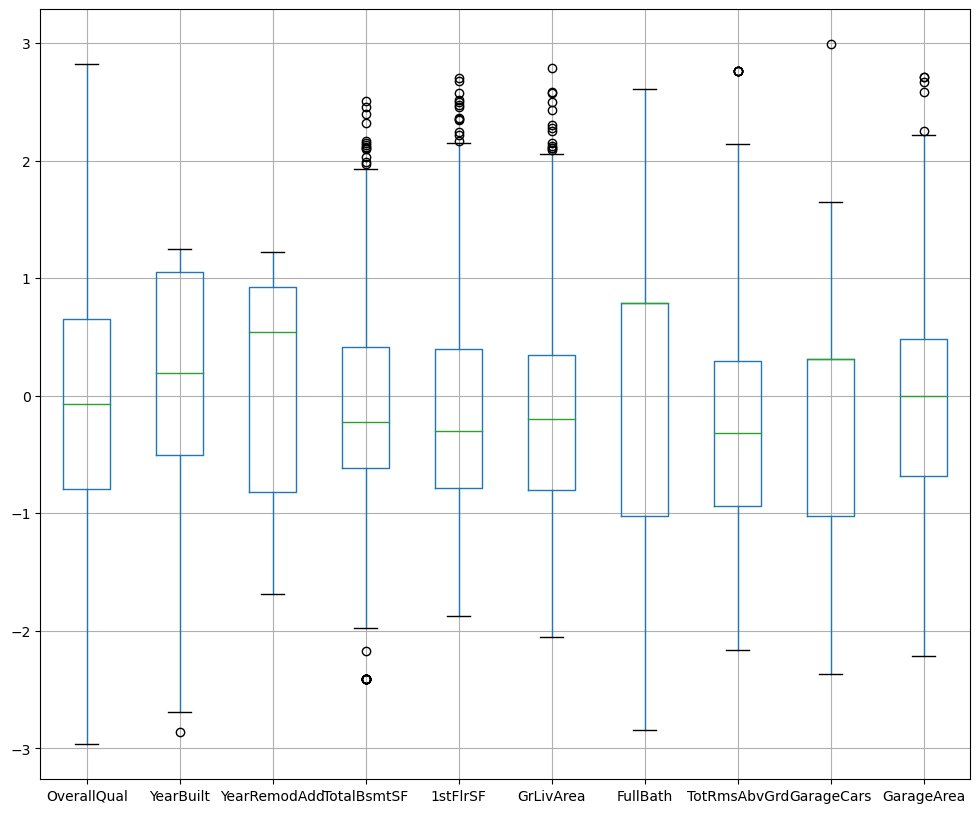

In [329]:
#Vérification des boites à moustaches après la suppression des valeurs aberrantes 
data_num_scaled[liste_affichage].boxplot(figsize= (12,10))

## Corrélation

    Une fois les valeurs aberrantes supprimées, on peux calculer les corrélations entre tes variables numériques et la variable cible.
    Les corrélations obtenues devraient mieux refléter les relations réelles entre tes variables et la variable cible

In [330]:
data_select = data["SalePrice"]
data_num_scaled_with_label = data_num_scaled.join(data_select,  how='inner') # 'outer' pour garder tous les indices, 'inner' pour garder les indices communs
data_num_scaled_with_label

GarageYrBlt  MasVnrArea        Id  Fireplaces  KitchenAbvGr  \
0        1.017598    0.514104 -1.730865   -0.951226     -0.211454   
2        0.934226    0.325915 -1.726120    0.600495     -0.211454   
4        0.892540    1.366489 -1.721374    0.600495     -0.211454   
6        1.059284    0.458754 -1.716629    0.600495     -0.211454   
10      -0.566474   -0.570750 -1.707138   -0.951226     -0.211454   
...           ...         ...       ...         ...           ...   
1452     1.100970   -0.127953  1.714256   -0.951226     -0.211454   
1453     0.058817   -0.570750  1.716629   -0.951226     -0.211454   
1454     1.059284   -0.570750  1.719002   -0.951226     -0.211454   
1455     0.850854   -0.570750  1.721374    0.600495     -0.211454   
1456    -0.024555    0.087911  1.723747    2.152216     -0.211454   

      BedroomAbvGr  HalfBath  FullBath  BsmtHalfBath  TotRmsAbvGrd  ...  \
0         0.163779  1.227585  0.789741     -0.241061      0.912210  ...   
2         0.163779  1.227585  0.789741     -0.241061     -0.318683  ...   
4         1.390023  1.227585  0.789741     -0.241061      1.527656  ...   
6         0.163779 -0.761621  0.789741     -0.241061      0.296763  ...   
10        0.163779 -0.761621 -1.026041     -0.241061     -0.934130  ...   
...            ...       ...       ...           ...           ...  ...   
1452     -1.062465 -0.761621 -1.026041     -0.241061     -0.934130  ...   
1453      0.163779 -0.761621 -1.026041     -0.241061     -0.318683  ...   
1454     -1.062465 -0.761621  0.789741     -0.241061     -0.318683  ...   
1455      0.163779  1.227585  0.789741     -0.241061      0.296763  ...   
1456      0.163779 -0.761621  0.789741     -0.241061      0.296763  ...   

      OverallCond  YearRemodAdd  2ndFlrSF  BsmtFinSF2  1stFlrSF  MSSubClass  \
0       -0.517200      0.878668  1.161852   -0.288653 -0.793434    0.073375   
2       -0.517200      0.830215  1.189351   -0.288653 -0.627826    0.073375   
4       -0.517200      0.733308  1.617877   -0.288653 -0.045611    0.073375   
6       -0.517200      0.975575 -0.795163   -0.288653  1.374993   -0.872563   
10      -0.517200     -0.962566 -0.795163   -0.288653 -0.317311   -0.872563   
...           ...           ...       ...         ...       ...         ...   
1452    -0.517200      0.975575 -0.795163   -0.288653 -0.234508    2.911188   
1453    -0.517200      1.024029 -0.795163   -0.288653 -0.058549   -0.872563   
1454    -0.517200      0.975575 -0.795163   -0.288653  0.151048   -0.872563   
1455    -0.517200      0.733308  0.795198   -0.288653 -0.542435    0.073375   
1456     0.381743      0.151865 -0.795163    0.722112  2.355701   -0.872563   

      TotalBsmtSF  BsmtUnfSF  BsmtFinSF1  SalePrice  
0       -0.459303  -0.944591    0.575425     208500  
2       -0.313369  -0.301643    0.092907     223500  
4        0.199680  -0.174865    0.463568     250000  
6        1.433276  -0.566519    2.029558     307000  
10      -0.039743  -0.980813    1.014077     129500  
...           ...        ...         ...        ...  
1452    -1.163889  -1.284176    0.226696     145000  
1453     0.188279   1.296670   -0.973018      84500  
1454     0.372976   0.551847   -0.073781     185000  
1455    -0.238122   0.873321   -0.973018     175000  
1456     1.104925   0.049262    0.759659     210000  

[1030 rows x 37 columns]

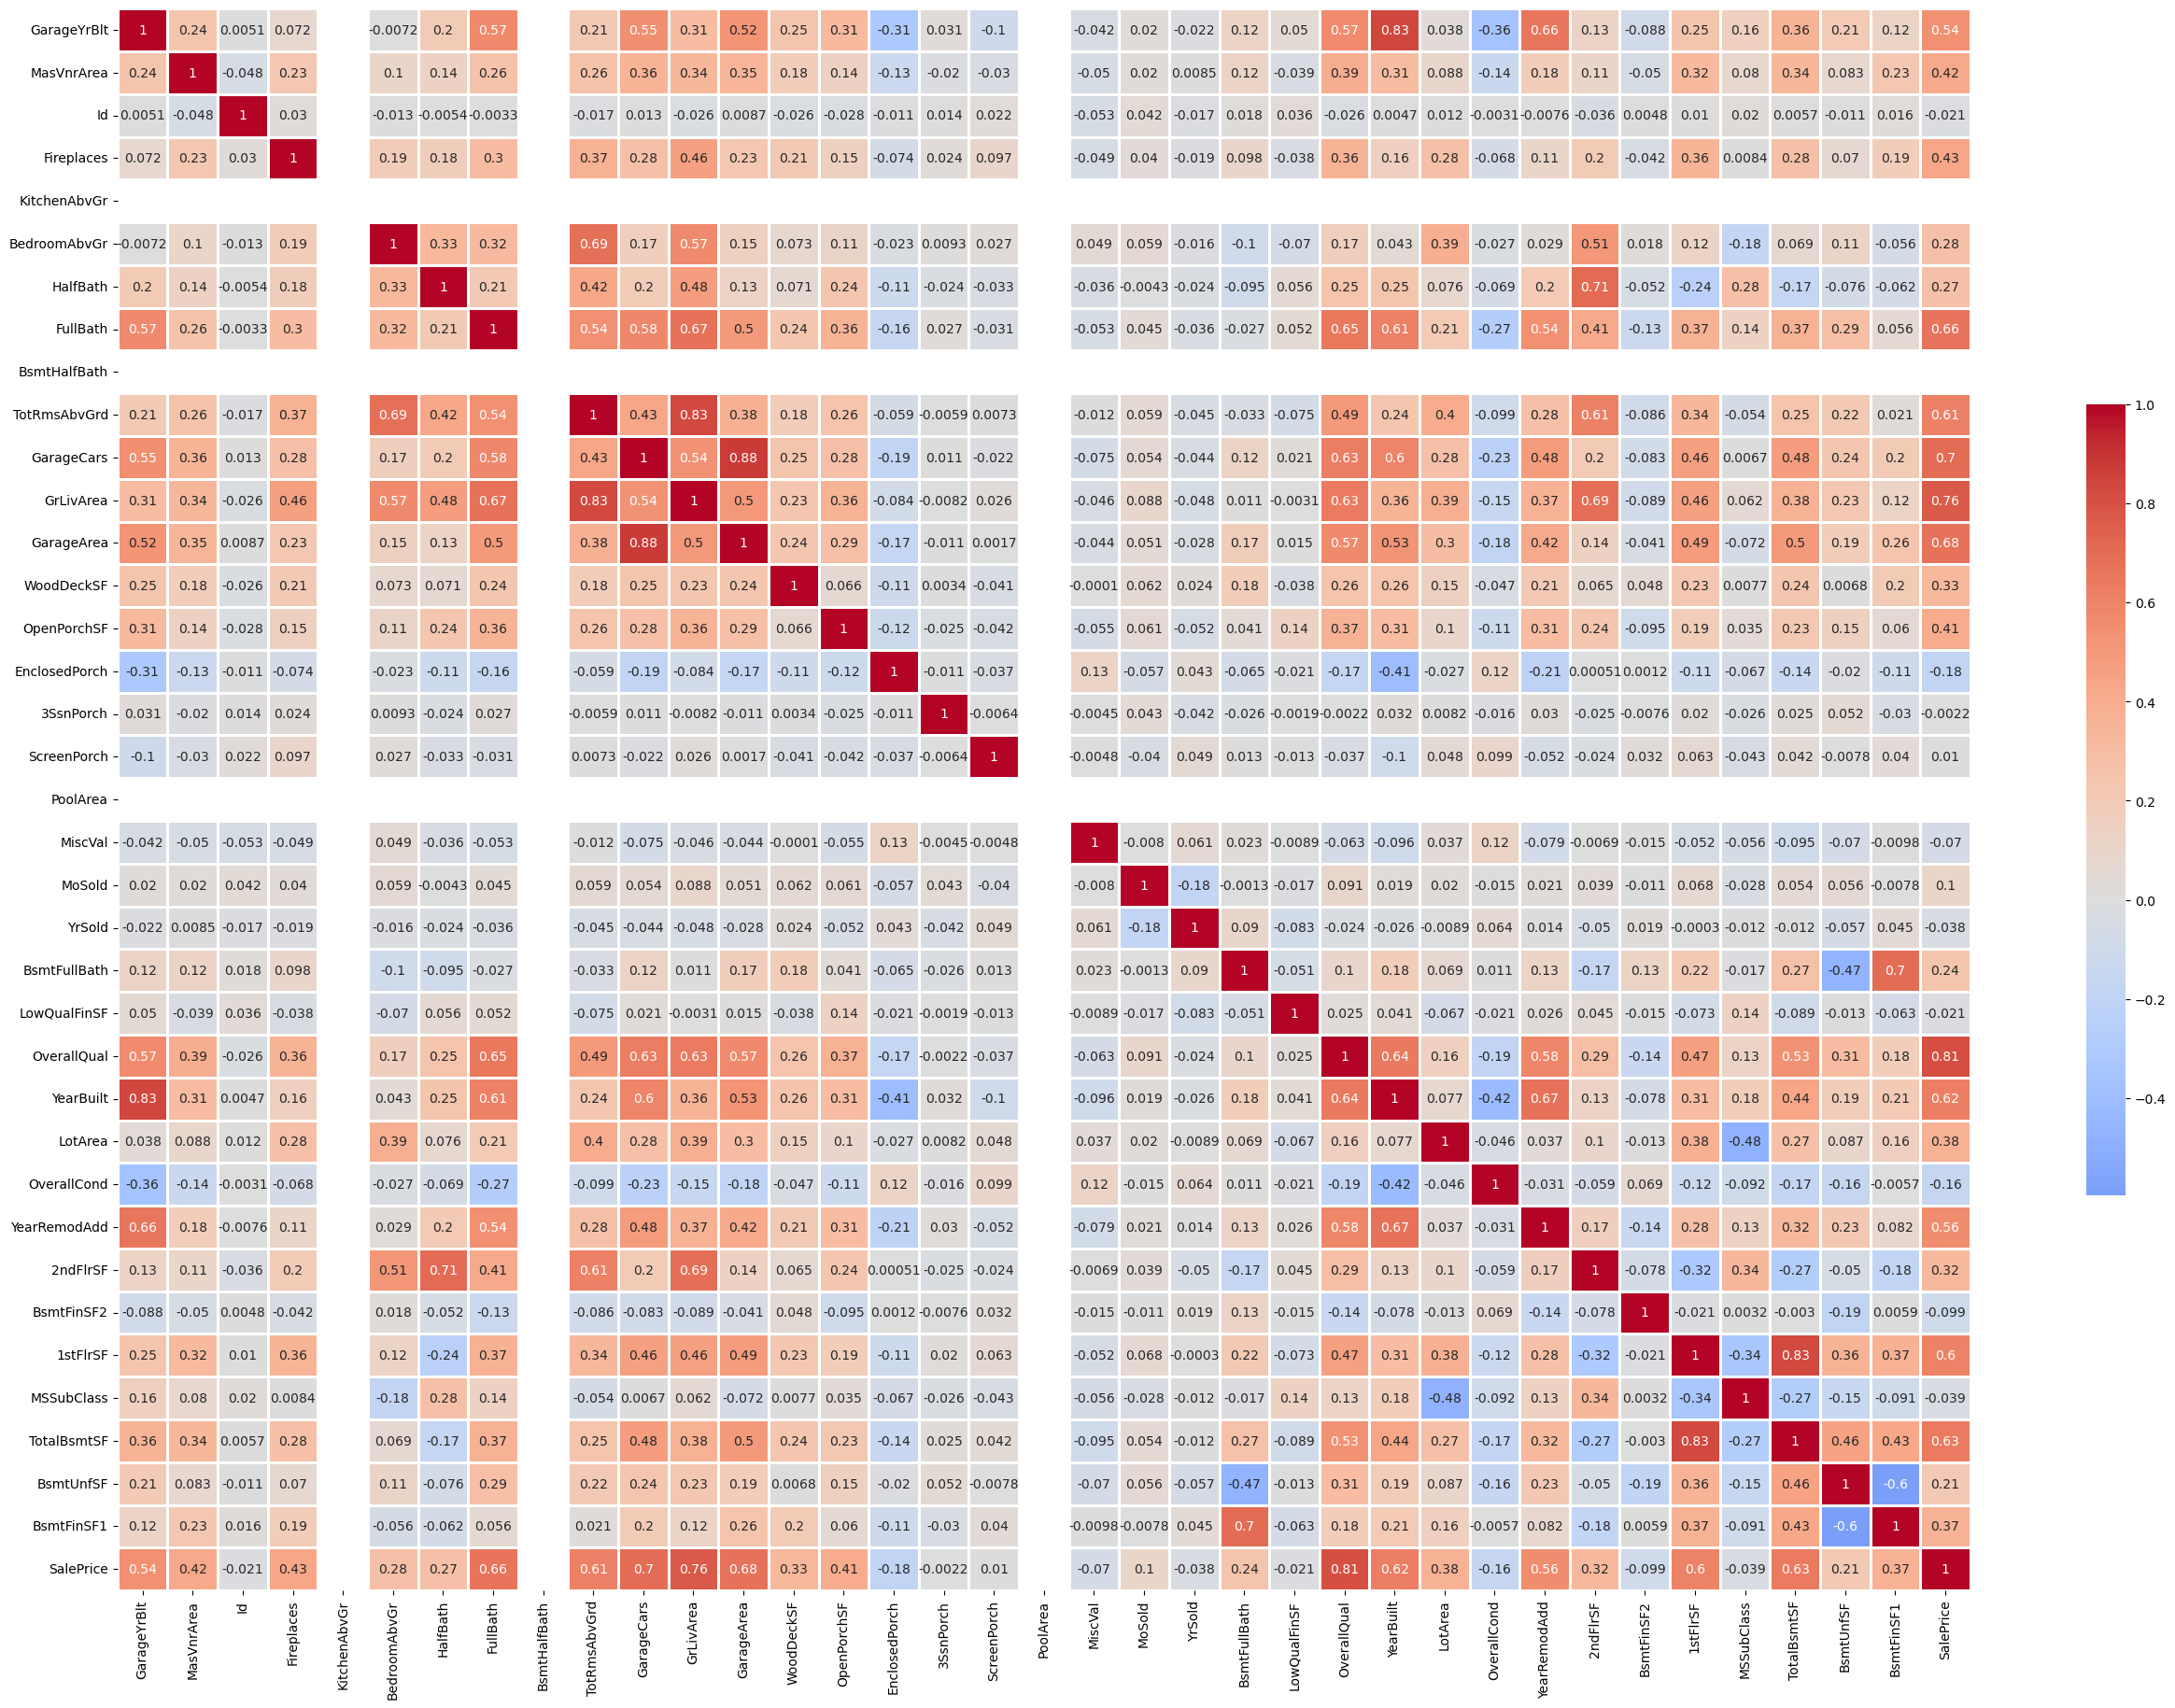

In [331]:
plt.figure(figsize = (30,10))
h = sns.heatmap(data_num_scaled_with_label.corr(), linewidths=0.8, center = 0, cbar_kws={"shrink": .5}, cmap = 'coolwarm', annot = True)
h.figure.set_size_inches(32,22)
plt.show()

$\textbf{Remarques}$

Les colonnes avec des valeurs constantes : Si une colonne a la même valeur pour toutes les observations, la variance est nulle. Cela peut entraîner des divisions par zéro lors du calcul de la corrélation, produisant des NaN

In [332]:
#Exemple avec cette variable
data_num_scaled_with_label["KitchenAbvGr"]

0      -0.211454
2      -0.211454
4      -0.211454
6      -0.211454
10     -0.211454
          ...   
1452   -0.211454
1453   -0.211454
1454   -0.211454
1455   -0.211454
1456   -0.211454
Name: KitchenAbvGr, Length: 1030, dtype: float64

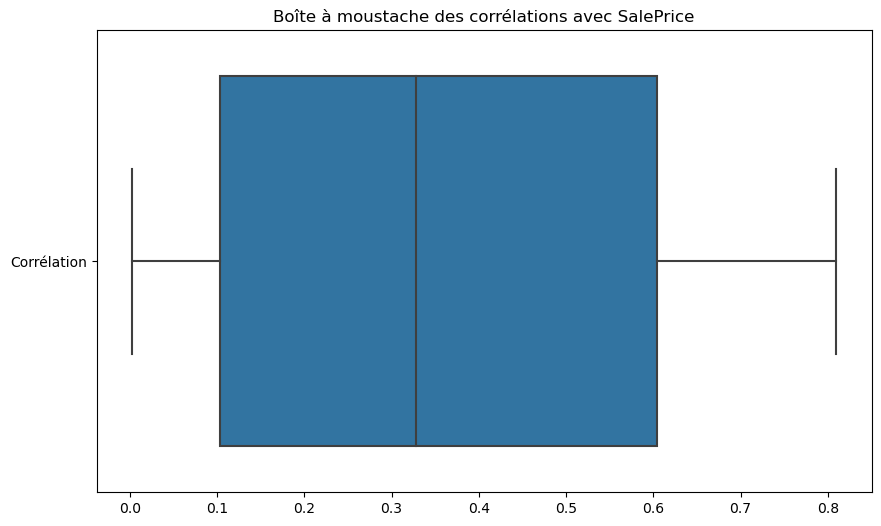

In [333]:
corr_values = abs(data_num_scaled_with_label.corr()['SalePrice'].values)
corr_values_clean = corr_values[~np.isnan(corr_values)] # Retirer les valeurs NaN
corr_values_clean = corr_values_clean[:-1] # on enleve la corrélation parfaite (correlation(target,target))
# Convertir en DataFrame pour seaborn


df_corr = pd.DataFrame(corr_values_clean, columns=['Corrélation'])
# Créer la boîte à moustache (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_corr, orient='h')
# Ajouter un titre et afficher le graphique
plt.title('Boîte à moustache des corrélations avec SalePrice')
plt.show()

In [334]:
print(df_corr.quantile(0.25)) #Q1 quartile 1
print(df_corr.quantile(0.50)) #Mediane
print(df_corr.quantile(0.75)) #Q3 quartile 3

Corrélation    0.103431
Name: 0.25, dtype: float64
Corrélation    0.328237
Name: 0.5, dtype: float64
Corrélation    0.604683
Name: 0.75, dtype: float64


Lignes directrices générales pour les corrélations :

    Corrélation faible : |corrélation| < 0,3
    Corrélation modérée : 0,3 ≤ |corrélation| < 0,5
    Corrélation forte : |corrélation| ≥ 0,5

In [335]:
#On enleve ceux qui ont des corrélations faible:

corr_target = data_num_scaled_with_label.corr()['SalePrice']
corr_target = corr_target[~np.isnan(corr_target)]

variables_supprimer = []
for i in(corr_target.index):
    if abs(corr_target[i]) < 0.3:
        variables_supprimer.append(i)
        
data_num_scaled_with_label = data_num_scaled_with_label.drop(variables_supprimer,axis=1)
data_num_scaled_with_label

GarageYrBlt  MasVnrArea  Fireplaces  KitchenAbvGr  FullBath  \
0        1.017598    0.514104   -0.951226     -0.211454  0.789741   
2        0.934226    0.325915    0.600495     -0.211454  0.789741   
4        0.892540    1.366489    0.600495     -0.211454  0.789741   
6        1.059284    0.458754    0.600495     -0.211454  0.789741   
10      -0.566474   -0.570750   -0.951226     -0.211454 -1.026041   
...           ...         ...         ...           ...       ...   
1452     1.100970   -0.127953   -0.951226     -0.211454 -1.026041   
1453     0.058817   -0.570750   -0.951226     -0.211454 -1.026041   
1454     1.059284   -0.570750   -0.951226     -0.211454  0.789741   
1455     0.850854   -0.570750    0.600495     -0.211454  0.789741   
1456    -0.024555    0.087911    2.152216     -0.211454  0.789741   

      BsmtHalfBath  TotRmsAbvGrd  GarageCars  GrLivArea  GarageArea  ...  \
0        -0.241061      0.912210    0.311725   0.370333    0.351000  ...   
2        -0.241061     -0.318683    0.311725   0.515013    0.631726  ...   
4        -0.241061      1.527656    1.650307   1.299326    1.698485  ...   
6        -0.241061      0.296763    0.311725   0.339875    0.762732  ...   
10       -0.241061     -0.934130   -1.026858  -0.905127   -0.416317  ...   
...            ...           ...         ...        ...         ...  ...   
1452     -0.241061     -0.934130    0.311725  -0.844210    0.243389  ...   
1453     -0.241061     -0.318683   -2.365440  -0.714760   -2.212963  ...   
1454     -0.241061     -0.318683    0.311725  -0.560562   -0.341457  ...   
1455     -0.241061      0.296763    0.311725   0.250402   -0.060731  ...   
1456     -0.241061      0.296763    0.311725   1.061367    0.126420  ...   

      PoolArea  OverallQual  YearBuilt   LotArea  YearRemodAdd  2ndFlrSF  \
0    -0.068692     0.651479   1.050994 -0.207142      0.878668  1.161852   
2    -0.068692     0.651479   0.984752  0.073480      0.830215  1.189351   
4    -0.068692     1.374795   0.951632  0.375148      0.733308  1.617877   
6    -0.068692     1.374795   1.084115 -0.043379      0.975575 -0.795163   
10   -0.068692    -0.795151  -0.207594  0.068469     -0.962566 -0.795163   
...        ...          ...        ...       ...           ...       ...   
1452 -0.068692    -0.795151   1.117235 -0.685702      0.975575 -0.795163   
1453 -0.068692    -0.795151   1.150356  0.671505      1.024029 -0.795163   
1454 -0.068692     0.651479   1.084115 -0.302353      0.975575 -0.795163   
1455 -0.068692    -0.071836   0.918511 -0.260560      0.733308  0.795198   
1456 -0.068692    -0.071836   0.222975  0.266407      0.151865 -0.795163   

      1stFlrSF  TotalBsmtSF  BsmtFinSF1  SalePrice  
0    -0.793434    -0.459303    0.575425     208500  
2    -0.627826    -0.313369    0.092907     223500  
4    -0.045611     0.199680    0.463568     250000  
6     1.374993     1.433276    2.029558     307000  
10   -0.317311    -0.039743    1.014077     129500  
...        ...          ...         ...        ...  
1452 -0.234508    -1.163889    0.226696     145000  
1453 -0.058549     0.188279   -0.973018      84500  
1454  0.151048     0.372976   -0.073781     185000  
1455 -0.542435    -0.238122   -0.973018     175000  
1456  2.355701     1.104925    0.759659     210000  

[1030 rows x 22 columns]

## Calcul du VIF 


Le VIF (Variance Inflation Factor) est une mesure utilisée en statistique pour détecter la multicolinéarité entre les variables indépendantes dans un modèle de régression. La multicolinéarité survient lorsque deux ou plusieurs variables explicatives (ou indépendantes) dans un modèle de régression sont fortement corrélées, ce qui peut entraîner des problèmes d'interprétation des coefficients du modèle.


Le VIF quantifie à quel point la variance d'un coefficient de régression est gonflée à cause de la corrélation avec les autres variables. En d'autres termes, il permet de savoir si une variable explicative est redondante par rapport aux autres.

- VIF élevé : Indique une forte corrélation entre la variable et une ou plusieurs autres variables du modèle. Cela signifie que cette variable apporte peu d'information nouvelle et peut rendre le modèle instable.

- VIF faible : Indique que la variable explicative est peu ou pas corrélée avec les autres variables du modèle, ce qui est généralement souhaitable pour obtenir des coefficients stables.


- Interprétation du VIF:

        VIF = 1 : Aucune corrélation avec les autres variables, c'est l'idéal.
        VIF entre 1 et 5 : Niveau modéré de corrélation, généralement acceptable.
        VIF > 5 : Corrélation élevée entre les variables, cela commence à poser un problème.
        VIF > 10 : Multicolinéarité sévère, la variable doit généralement être retirée du modèle.

In [336]:
#On enleve la variable cible
data_num_scaled_without_label = data_num_scaled_with_label.drop(["SalePrice"], axis=1)                                  

In [337]:
# Calculer le VIF pour chaque variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data = pd.DataFrame()
vif_data['Variable'] = data_num_scaled_without_label.columns
vif_data['VIF'] = [variance_inflation_factor(data_num_scaled_without_label.values, i)
                   for i in range(data_num_scaled_without_label.shape[1])]

# Trier les résultats par VIF en ordre décroissant
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data_sorted)

        Variable          VIF
8      GrLivArea  9592.859785
17      2ndFlrSF  8409.338383
18      1stFlrSF  5616.358125
7     GarageCars     5.525564
9     GarageArea     5.037978
14     YearBuilt     4.477282
19   TotalBsmtSF     4.067156
0    GarageYrBlt     3.812039
6   TotRmsAbvGrd     3.544359
13   OverallQual     3.086450
4       FullBath     2.790720
16  YearRemodAdd     2.199600
2     Fireplaces     1.425509
15       LotArea     1.411645
20    BsmtFinSF1     1.351327
1     MasVnrArea     1.311343
11   OpenPorchSF     1.282613
10    WoodDeckSF     1.161340
3   KitchenAbvGr     0.012832
5   BsmtHalfBath     0.002323
12      PoolArea     0.000000


C:\Users\flori\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide



Colinéarité Parfaite :

    Une valeur de VIF infinie indique souvent une colinéarité parfaite entre certaines variables. En d'autres termes, une ou plusieurs variables sont parfaitement prédites par une combinaison linéaire des autres variables

In [ ]:
#Si on a des VIF infini
"""""
# Filtrer les variables avec VIF infini
vif_data = vif_data[vif_data['VIF'] != float('inf')]
    
# Obtenir les variables à conserver
variables_a_conserver = vif_data['Variable'].tolist()
    
# Supprimer les variables avec VIF infini du DataFrame original
data_sans_vif_infini = data_num[variables_a_conserver].copy()
data_sans_vif_infini

In [338]:
def seuil_vif(vif_data_sorted, seuil):
    
    # Filtrer les variables avec VIF infini
    vif_data_sorted = vif_data_sorted[vif_data_sorted['VIF'] < seuil]
    
    # Obtenir les variables à conserver
    variables_a_conserver = vif_data_sorted['Variable'].tolist()
    
    # Supprimer les variables avec VIF eleve du DataFrame original
    data_sans_vif_eleve = data_num_scaled_with_label[variables_a_conserver].copy()
    return data_sans_vif_eleve

data_num_without_label_final = seuil_vif(vif_data_sorted, 10)
data_num_without_label_final

GarageCars  GarageArea  YearBuilt  TotalBsmtSF  GarageYrBlt  \
0       0.311725    0.351000   1.050994    -0.459303     1.017598   
2       0.311725    0.631726   0.984752    -0.313369     0.934226   
4       1.650307    1.698485   0.951632     0.199680     0.892540   
6       0.311725    0.762732   1.084115     1.433276     1.059284   
10     -1.026858   -0.416317  -0.207594    -0.039743    -0.566474   
...          ...         ...        ...          ...          ...   
1452    0.311725    0.243389   1.117235    -1.163889     1.100970   
1453   -2.365440   -2.212963   1.150356     0.188279     0.058817   
1454    0.311725   -0.341457   1.084115     0.372976     1.059284   
1455    0.311725   -0.060731   0.918511    -0.238122     0.850854   
1456    0.311725    0.126420   0.222975     1.104925    -0.024555   

      TotRmsAbvGrd  OverallQual  FullBath  YearRemodAdd  Fireplaces   LotArea  \
0         0.912210     0.651479  0.789741      0.878668   -0.951226 -0.207142   
2        -0.318683     0.651479  0.789741      0.830215    0.600495  0.073480   
4         1.527656     1.374795  0.789741      0.733308    0.600495  0.375148   
6         0.296763     1.374795  0.789741      0.975575    0.600495 -0.043379   
10       -0.934130    -0.795151 -1.026041     -0.962566   -0.951226  0.068469   
...            ...          ...       ...           ...         ...       ...   
1452     -0.934130    -0.795151 -1.026041      0.975575   -0.951226 -0.685702   
1453     -0.318683    -0.795151 -1.026041      1.024029   -0.951226  0.671505   
1454     -0.318683     0.651479  0.789741      0.975575   -0.951226 -0.302353   
1455      0.296763    -0.071836  0.789741      0.733308    0.600495 -0.260560   
1456      0.296763    -0.071836  0.789741      0.151865    2.152216  0.266407   

      BsmtFinSF1  MasVnrArea  OpenPorchSF  WoodDeckSF  KitchenAbvGr  \
0       0.575425    0.514104     0.216503   -0.752176     -0.211454   
2       0.092907    0.325915    -0.070361   -0.752176     -0.211454   
4       0.463568    1.366489     0.563760    0.780197     -0.211454   
6       2.029558    0.458754     0.156111    1.283007     -0.211454   
10      1.014077   -0.570750    -0.704483   -0.752176     -0.211454   
...          ...         ...          ...         ...           ...   
1452    0.226696   -0.127953    -0.281735   -0.752176     -0.211454   
1453   -0.973018   -0.570750     0.141012   -0.464856     -0.211454   
1454   -0.073781   -0.570750     1.001606   -0.752176     -0.211454   
1455   -0.973018   -0.570750    -0.100558   -0.752176     -0.211454   
1456    0.759659    0.087911    -0.704483    2.033231     -0.211454   

      BsmtHalfBath  PoolArea  
0        -0.241061 -0.068692  
2        -0.241061 -0.068692  
4        -0.241061 -0.068692  
6        -0.241061 -0.068692  
10       -0.241061 -0.068692  
...            ...       ...  
1452     -0.241061 -0.068692  
1453     -0.241061 -0.068692  
1454     -0.241061 -0.068692  
1455     -0.241061 -0.068692  
1456     -0.241061 -0.068692  

[1030 rows x 18 columns]

In [339]:
data_select = data["SalePrice"]
data_num_scaled_with_label_final = data_num_without_label_final.join(data_select,  how='inner') # 'outer' pour garder tous les indices, 'inner' pour garder les indices communs
data_num_scaled_with_label_final 

GarageCars  GarageArea  YearBuilt  TotalBsmtSF  GarageYrBlt  \
0       0.311725    0.351000   1.050994    -0.459303     1.017598   
2       0.311725    0.631726   0.984752    -0.313369     0.934226   
4       1.650307    1.698485   0.951632     0.199680     0.892540   
6       0.311725    0.762732   1.084115     1.433276     1.059284   
10     -1.026858   -0.416317  -0.207594    -0.039743    -0.566474   
...          ...         ...        ...          ...          ...   
1452    0.311725    0.243389   1.117235    -1.163889     1.100970   
1453   -2.365440   -2.212963   1.150356     0.188279     0.058817   
1454    0.311725   -0.341457   1.084115     0.372976     1.059284   
1455    0.311725   -0.060731   0.918511    -0.238122     0.850854   
1456    0.311725    0.126420   0.222975     1.104925    -0.024555   

      TotRmsAbvGrd  OverallQual  FullBath  YearRemodAdd  Fireplaces   LotArea  \
0         0.912210     0.651479  0.789741      0.878668   -0.951226 -0.207142   
2        -0.318683     0.651479  0.789741      0.830215    0.600495  0.073480   
4         1.527656     1.374795  0.789741      0.733308    0.600495  0.375148   
6         0.296763     1.374795  0.789741      0.975575    0.600495 -0.043379   
10       -0.934130    -0.795151 -1.026041     -0.962566   -0.951226  0.068469   
...            ...          ...       ...           ...         ...       ...   
1452     -0.934130    -0.795151 -1.026041      0.975575   -0.951226 -0.685702   
1453     -0.318683    -0.795151 -1.026041      1.024029   -0.951226  0.671505   
1454     -0.318683     0.651479  0.789741      0.975575   -0.951226 -0.302353   
1455      0.296763    -0.071836  0.789741      0.733308    0.600495 -0.260560   
1456      0.296763    -0.071836  0.789741      0.151865    2.152216  0.266407   

      BsmtFinSF1  MasVnrArea  OpenPorchSF  WoodDeckSF  KitchenAbvGr  \
0       0.575425    0.514104     0.216503   -0.752176     -0.211454   
2       0.092907    0.325915    -0.070361   -0.752176     -0.211454   
4       0.463568    1.366489     0.563760    0.780197     -0.211454   
6       2.029558    0.458754     0.156111    1.283007     -0.211454   
10      1.014077   -0.570750    -0.704483   -0.752176     -0.211454   
...          ...         ...          ...         ...           ...   
1452    0.226696   -0.127953    -0.281735   -0.752176     -0.211454   
1453   -0.973018   -0.570750     0.141012   -0.464856     -0.211454   
1454   -0.073781   -0.570750     1.001606   -0.752176     -0.211454   
1455   -0.973018   -0.570750    -0.100558   -0.752176     -0.211454   
1456    0.759659    0.087911    -0.704483    2.033231     -0.211454   

      BsmtHalfBath  PoolArea  SalePrice  
0        -0.241061 -0.068692     208500  
2        -0.241061 -0.068692     223500  
4        -0.241061 -0.068692     250000  
6        -0.241061 -0.068692     307000  
10       -0.241061 -0.068692     129500  
...            ...       ...        ...  
1452     -0.241061 -0.068692     145000  
1453     -0.241061 -0.068692      84500  
1454     -0.241061 -0.068692     185000  
1455     -0.241061 -0.068692     175000  
1456     -0.241061 -0.068692     210000  

[1030 rows x 19 columns]

## Variable cible 

Avant Transformation Skew:  1.154431327209261
Après transformation Skew:  -0.11583742616708971


C:\Users\flori\AppData\Local\Temp\ipykernel_36468\3197625616.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\flori\AppData\Local\Temp\ipykernel_36468\3197625616.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




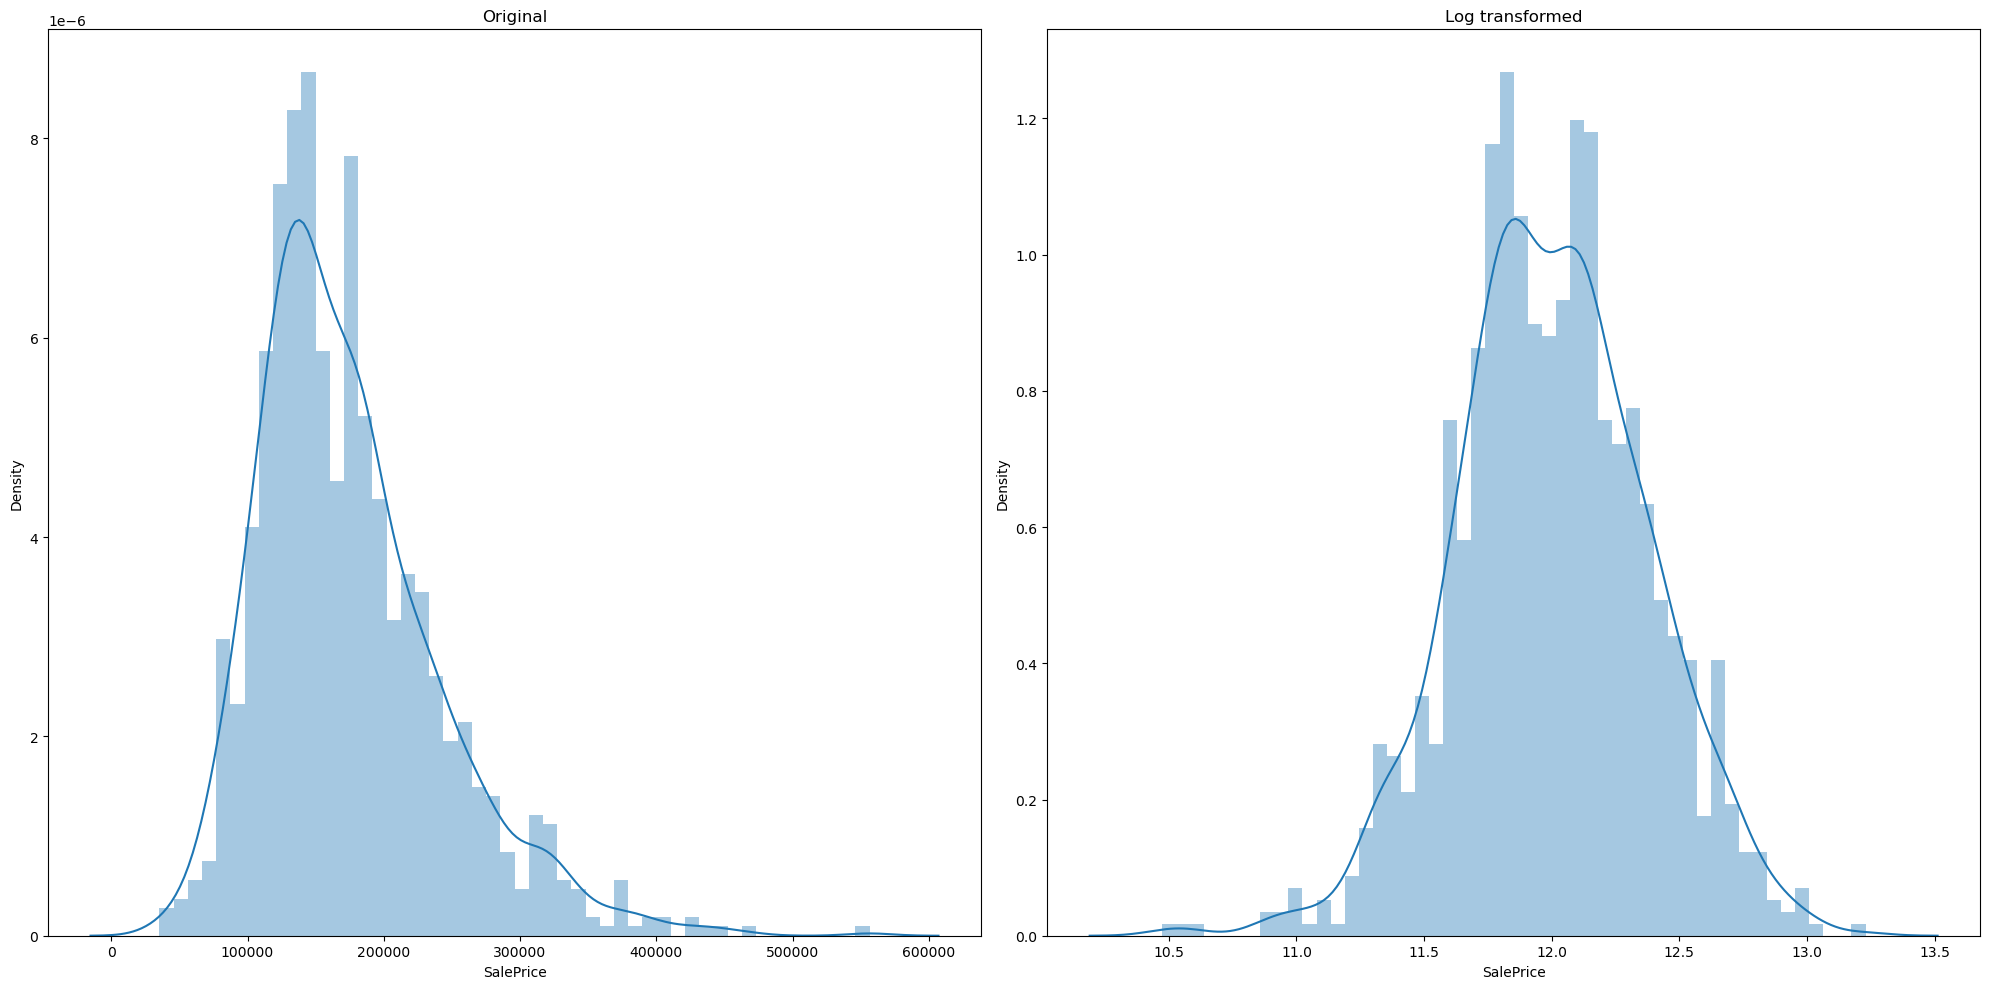

In [340]:
target_log_tran = np.log1p(data_num_scaled_with_label_final.SalePrice)#Transformation logarithmique
print('Avant Transformation Skew: ', data_num_scaled_with_label_final['SalePrice'].skew())
print('Après transformation Skew: ', target_log_tran.skew())

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(data_num_scaled_with_label_final.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(target_log_tran, bins=50)
plt.title('Log transformed')

plt.tight_layout()

On a $\textbf{une distribution biaisé à droite}$. On a du mal a obervé les valeurs aberrantes à droite pour cela on applique une transformation de variable en log pour ce que soit plus facilement observable.

Pour les données normalement distribuées l'asymétrie doit être d'environ zéro. La fonction $\textbf{skewness}$ peut être utilisée pour déterminer si la valeur d'asymétrie est suffisamment proche de zéro

skewness = 0 : normallement distribué

$\textbf{skewness > 0 : Plus de poids dans la queue gauche de la distribution.}$

skewness < 0 : Plus de poids dans la queue droite de la distribution. 

Text(0.5, 1.0, 'Log transformed')

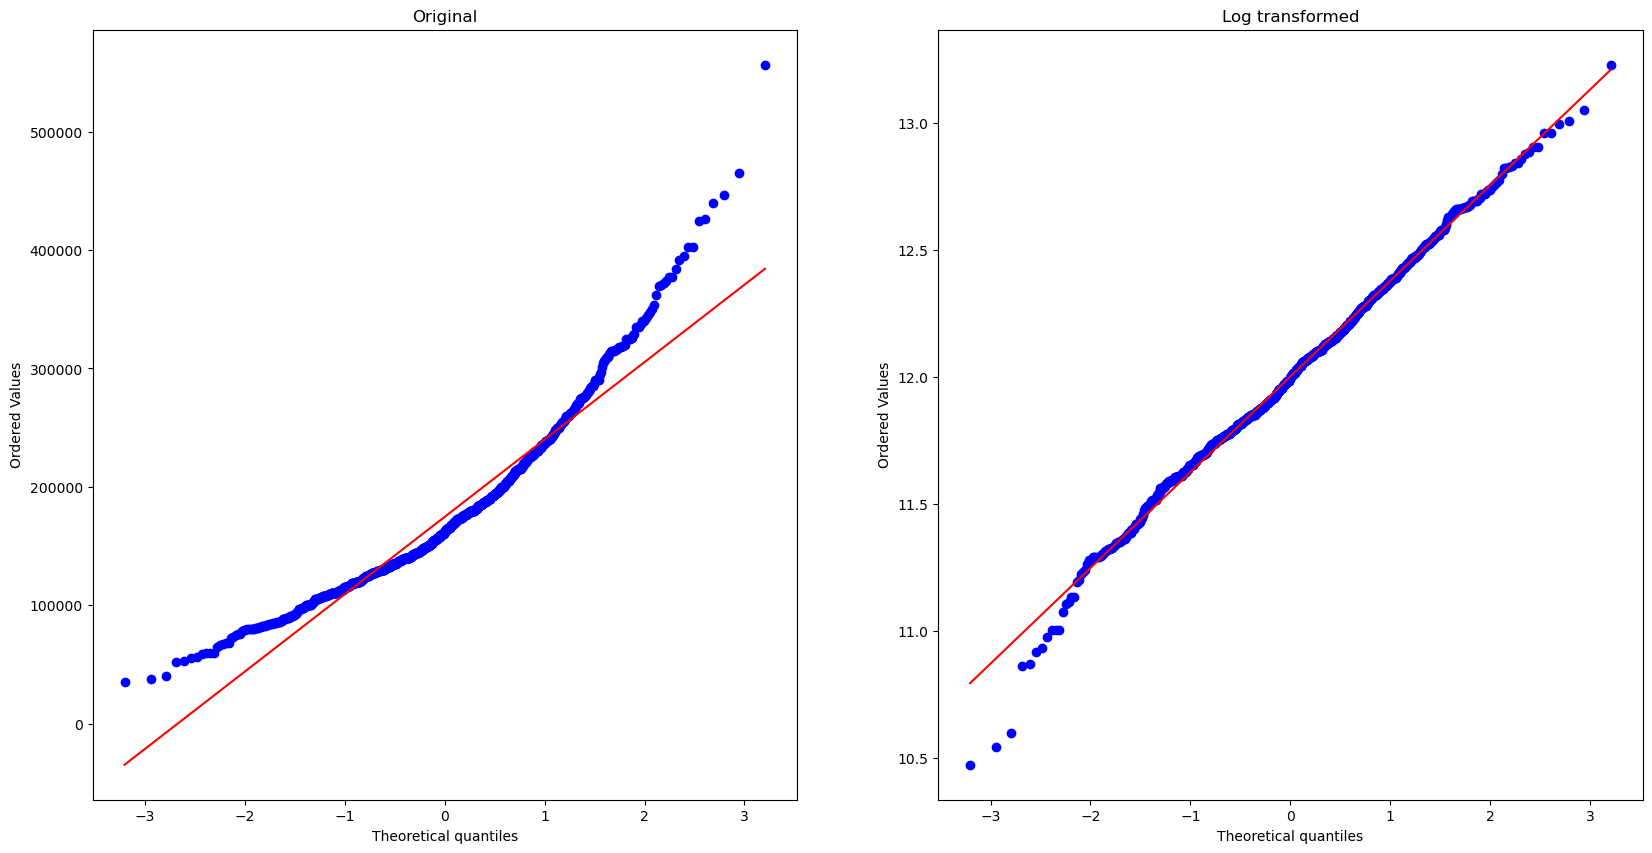

In [341]:
import pylab 
import scipy.stats as stats

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
stats.probplot(data_num_scaled_with_label_final.SalePrice, dist="norm", plot=pylab)
plt.title('Original')
#pylab.show()

plt.subplot(1,2,2)
stats.probplot(target_log_tran, dist="norm", plot=pylab)
plt.title('Log transformed')
#pylab.show()

Le QQ plot (Quantile-Quantile plot) est un outil visuel utilisé pour comparer la distribution d'une variable à une distribution théorique (comme une distribution normale). Si tu veux utiliser un QQ plot pour détecter et supprimer les valeurs extrêmes, tu devras visualiser les points qui dévient fortement de la ligne droite (c'est-à-dire, les points qui ne suivent pas la distribution attendue) et les considérer comme des valeurs aberrantes.

In [342]:
target_log_tran.sort_values(ascending = True)

916     10.471978
968     10.542733
30      10.596660
710     10.859018
1337    10.868587
          ...    
389     12.962197
473     12.994532
527     13.008662
1243    13.049795
1046    13.229570
Name: SalePrice, Length: 1030, dtype: float64

In [343]:
np.expm1(target_log_tran).sort_values(ascending = True)

916      35311.0
968      37900.0
30       40000.0
710      52000.0
1337     52500.0
          ...   
389     426000.0
473     440000.0
527     446261.0
1243    465000.0
1046    556581.0
Name: SalePrice, Length: 1030, dtype: float64

In [344]:
# Supposons que tu identifies les valeurs au-dessus de 41000 euros comme étant des valeurs aberrantes
threshold = 41000
df_num_clean = data_num_scaled_with_label_final[data_num_scaled_with_label_final["SalePrice"]>= threshold]

# Afficher les données nettoyées
df_num_clean

GarageCars  GarageArea  YearBuilt  TotalBsmtSF  GarageYrBlt  \
0       0.311725    0.351000   1.050994    -0.459303     1.017598   
2       0.311725    0.631726   0.984752    -0.313369     0.934226   
4       1.650307    1.698485   0.951632     0.199680     0.892540   
6       0.311725    0.762732   1.084115     1.433276     1.059284   
10     -1.026858   -0.416317  -0.207594    -0.039743    -0.566474   
...          ...         ...        ...          ...          ...   
1452    0.311725    0.243389   1.117235    -1.163889     1.100970   
1453   -2.365440   -2.212963   1.150356     0.188279     0.058817   
1454    0.311725   -0.341457   1.084115     0.372976     1.059284   
1455    0.311725   -0.060731   0.918511    -0.238122     0.850854   
1456    0.311725    0.126420   0.222975     1.104925    -0.024555   

      TotRmsAbvGrd  OverallQual  FullBath  YearRemodAdd  Fireplaces   LotArea  \
0         0.912210     0.651479  0.789741      0.878668   -0.951226 -0.207142   
2        -0.318683     0.651479  0.789741      0.830215    0.600495  0.073480   
4         1.527656     1.374795  0.789741      0.733308    0.600495  0.375148   
6         0.296763     1.374795  0.789741      0.975575    0.600495 -0.043379   
10       -0.934130    -0.795151 -1.026041     -0.962566   -0.951226  0.068469   
...            ...          ...       ...           ...         ...       ...   
1452     -0.934130    -0.795151 -1.026041      0.975575   -0.951226 -0.685702   
1453     -0.318683    -0.795151 -1.026041      1.024029   -0.951226  0.671505   
1454     -0.318683     0.651479  0.789741      0.975575   -0.951226 -0.302353   
1455      0.296763    -0.071836  0.789741      0.733308    0.600495 -0.260560   
1456      0.296763    -0.071836  0.789741      0.151865    2.152216  0.266407   

      BsmtFinSF1  MasVnrArea  OpenPorchSF  WoodDeckSF  KitchenAbvGr  \
0       0.575425    0.514104     0.216503   -0.752176     -0.211454   
2       0.092907    0.325915    -0.070361   -0.752176     -0.211454   
4       0.463568    1.366489     0.563760    0.780197     -0.211454   
6       2.029558    0.458754     0.156111    1.283007     -0.211454   
10      1.014077   -0.570750    -0.704483   -0.752176     -0.211454   
...          ...         ...          ...         ...           ...   
1452    0.226696   -0.127953    -0.281735   -0.752176     -0.211454   
1453   -0.973018   -0.570750     0.141012   -0.464856     -0.211454   
1454   -0.073781   -0.570750     1.001606   -0.752176     -0.211454   
1455   -0.973018   -0.570750    -0.100558   -0.752176     -0.211454   
1456    0.759659    0.087911    -0.704483    2.033231     -0.211454   

      BsmtHalfBath  PoolArea  SalePrice  
0        -0.241061 -0.068692     208500  
2        -0.241061 -0.068692     223500  
4        -0.241061 -0.068692     250000  
6        -0.241061 -0.068692     307000  
10       -0.241061 -0.068692     129500  
...            ...       ...        ...  
1452     -0.241061 -0.068692     145000  
1453     -0.241061 -0.068692      84500  
1454     -0.241061 -0.068692     185000  
1455     -0.241061 -0.068692     175000  
1456     -0.241061 -0.068692     210000  

[1027 rows x 19 columns]

## Traitement variable non numérique

In [345]:
def data_non_numerique(data) : 
    print(data.dtypes.value_counts())
    data_non_num = data.select_dtypes(include=['object']) #int et float 
    return data_non_num
data_non_num = data_non_numerique(data)
data_non_num

object     37
int64      35
float64     2
Name: count, dtype: int64


GarageCond GarageType GarageFinish GarageQual BsmtFinType2 BsmtExposure  \
0            TA     Attchd          RFn         TA          Unf           No   
1            TA     Attchd          RFn         TA          Unf           Gd   
2            TA     Attchd          RFn         TA          Unf           Mn   
3            TA     Detchd          Unf         TA          Unf           No   
4            TA     Attchd          RFn         TA          Unf           Av   
...         ...        ...          ...        ...          ...          ...   
1455         TA     Attchd          RFn         TA          Unf           No   
1456         TA     Attchd          Unf         TA          Rec           No   
1457         TA     Attchd          RFn         TA          Unf           No   
1458         TA     Attchd          Unf         TA          Rec           Mn   
1459         TA     Attchd          Fin         TA          LwQ           No   

     BsmtQual BsmtCond BsmtFinType1 Electrical  ... MSZoning CentralAir  \
0          Gd       TA          GLQ      SBrkr  ...       RL          Y   
1          Gd       TA          ALQ      SBrkr  ...       RL          Y   
2          Gd       TA          GLQ      SBrkr  ...       RL          Y   
3          TA       Gd          ALQ      SBrkr  ...       RL          Y   
4          Gd       TA          GLQ      SBrkr  ...       RL          Y   
...       ...      ...          ...        ...  ...      ...        ...   
1455       Gd       TA          Unf      SBrkr  ...       RL          Y   
1456       Gd       TA          ALQ      SBrkr  ...       RL          Y   
1457       TA       Gd          GLQ      SBrkr  ...       RL          Y   
1458       TA       TA          GLQ      FuseA  ...       RL          Y   
1459       TA       TA          BLQ      SBrkr  ...       RL          Y   

     Heating RoofStyle Foundation ExterCond ExterQual Exterior2nd Exterior1st  \
0       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
1       GasA     Gable     CBlock        TA        TA     MetalSd     MetalSd   
2       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
3       GasA     Gable     BrkTil        TA        TA     Wd Shng     Wd Sdng   
4       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
...      ...       ...        ...       ...       ...         ...         ...   
1455    GasA     Gable      PConc        TA        TA     VinylSd     VinylSd   
1456    GasA     Gable     CBlock        TA        TA     Plywood     Plywood   
1457    GasA     Gable      Stone        Gd        Ex     CmentBd     CemntBd   
1458    GasA       Hip     CBlock        TA        TA     MetalSd     MetalSd   
1459    GasA     Gable     CBlock        TA        Gd     HdBoard     HdBoard   

     RoofMatl  
0     CompShg  
1     CompShg  
2     CompShg  
3     CompShg  
4     CompShg  
...       ...  
1455  CompShg  
1456  CompShg  
1457  CompShg  
1458  CompShg  
1459  CompShg  

[1460 rows x 37 columns]

In [346]:
(data_non_num.describe().T).sort_values(by="freq", ascending=False)

count unique      top  freq
Utilities      1460      2   AllPub  1459
Street         1460      2     Pave  1454
Condition2     1460      8     Norm  1445
RoofMatl       1460      8  CompShg  1434
Heating        1460      6     GasA  1428
LandSlope      1460      3      Gtl  1382
CentralAir     1460      2        Y  1365
Functional     1460      7      Typ  1360
PavedDrive     1460      3        Y  1340
Electrical     1459      5    SBrkr  1334
GarageCond     1379      5       TA  1326
LandContour    1460      4      Lvl  1311
GarageQual     1379      5       TA  1311
BsmtCond       1423      4       TA  1311
ExterCond      1460      5       TA  1282
SaleType       1460      9       WD  1267
Condition1     1460      9     Norm  1260
BsmtFinType2   1422      6      Unf  1256
BldgType       1460      5     1Fam  1220
SaleCondition  1460      6   Normal  1198
MSZoning       1460      5       RL  1151
RoofStyle      1460      6    Gable  1141
LotConfig      1460      5   Inside  1052
BsmtExposure   1422      4       No   953
LotShape       1460      4      Reg   925
ExterQual      1460      4       TA   906
GarageType     1379      6   Attchd   870
HeatingQC      1460      5       Ex   741
KitchenQual    1460      4       TA   735
HouseStyle     1460      8   1Story   726
BsmtQual       1423      4       TA   649
Foundation     1460      6    PConc   647
GarageFinish   1379      3      Unf   605
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
BsmtFinType1   1423      6      Unf   430
Neighborhood   1460     25    NAmes   225

In [311]:
#Information sur les variables catégorielles
from plotly.offline import init_notebook_mode, iplot 
import plotly.figure_factory as ff

table_categorical = ff.create_table(data_non_num.describe(include=['O']).T,
index=True, index_title='Categorical columns')
iplot(table_categorical) #Informations variables catégorielles

In [347]:
data_non_num.isnull().values.any() # Il y a des valeurs manquantes dans la base

True

In [348]:
data_non_num.fillna(data_non_num.mode().iloc[0], inplace=True) #Replacer par la modalité le plus présent

In [349]:
print(data_non_num.isnull().values.any()) #Il n'y a plus de valeur manquante dans la base

False


In [350]:
data_non_num 

GarageCond GarageType GarageFinish GarageQual BsmtFinType2 BsmtExposure  \
0            TA     Attchd          RFn         TA          Unf           No   
1            TA     Attchd          RFn         TA          Unf           Gd   
2            TA     Attchd          RFn         TA          Unf           Mn   
3            TA     Detchd          Unf         TA          Unf           No   
4            TA     Attchd          RFn         TA          Unf           Av   
...         ...        ...          ...        ...          ...          ...   
1455         TA     Attchd          RFn         TA          Unf           No   
1456         TA     Attchd          Unf         TA          Rec           No   
1457         TA     Attchd          RFn         TA          Unf           No   
1458         TA     Attchd          Unf         TA          Rec           Mn   
1459         TA     Attchd          Fin         TA          LwQ           No   

     BsmtQual BsmtCond BsmtFinType1 Electrical  ... MSZoning CentralAir  \
0          Gd       TA          GLQ      SBrkr  ...       RL          Y   
1          Gd       TA          ALQ      SBrkr  ...       RL          Y   
2          Gd       TA          GLQ      SBrkr  ...       RL          Y   
3          TA       Gd          ALQ      SBrkr  ...       RL          Y   
4          Gd       TA          GLQ      SBrkr  ...       RL          Y   
...       ...      ...          ...        ...  ...      ...        ...   
1455       Gd       TA          Unf      SBrkr  ...       RL          Y   
1456       Gd       TA          ALQ      SBrkr  ...       RL          Y   
1457       TA       Gd          GLQ      SBrkr  ...       RL          Y   
1458       TA       TA          GLQ      FuseA  ...       RL          Y   
1459       TA       TA          BLQ      SBrkr  ...       RL          Y   

     Heating RoofStyle Foundation ExterCond ExterQual Exterior2nd Exterior1st  \
0       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
1       GasA     Gable     CBlock        TA        TA     MetalSd     MetalSd   
2       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
3       GasA     Gable     BrkTil        TA        TA     Wd Shng     Wd Sdng   
4       GasA     Gable      PConc        TA        Gd     VinylSd     VinylSd   
...      ...       ...        ...       ...       ...         ...         ...   
1455    GasA     Gable      PConc        TA        TA     VinylSd     VinylSd   
1456    GasA     Gable     CBlock        TA        TA     Plywood     Plywood   
1457    GasA     Gable      Stone        Gd        Ex     CmentBd     CemntBd   
1458    GasA       Hip     CBlock        TA        TA     MetalSd     MetalSd   
1459    GasA     Gable     CBlock        TA        Gd     HdBoard     HdBoard   

     RoofMatl  
0     CompShg  
1     CompShg  
2     CompShg  
3     CompShg  
4     CompShg  
...       ...  
1455  CompShg  
1456  CompShg  
1457  CompShg  
1458  CompShg  
1459  CompShg  

[1460 rows x 37 columns]

### label encoder 

In [351]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data) :
    # Initialiser le LabelEncoder
    
    # Initialiser le LabelEncoder
    label_encoder = LabelEncoder()

    # Appliquer LabelEncoder à chaque colonne du DataFrame
    for column in data.columns:
        data[column] = label_encoder.fit_transform(data[column])
        
    return data

# Afficher le DataFrame après encodage
data_non_num = label_encoder(data_non_num)
data_non_num 

GarageCond  GarageType  GarageFinish  GarageQual  BsmtFinType2  \
0              4           1             1           4             5   
1              4           1             1           4             5   
2              4           1             1           4             5   
3              4           5             2           4             5   
4              4           1             1           4             5   
...          ...         ...           ...         ...           ...   
1455           4           1             1           4             5   
1456           4           1             2           4             4   
1457           4           1             1           4             5   
1458           4           1             2           4             4   
1459           4           1             0           4             3   

      BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  Electrical  ...  \
0                3         2         3             2           4  ...   
1                1         2         3             0           4  ...   
2                2         2         3             2           4  ...   
3                3         3         1             0           4  ...   
4                0         2         3             2           4  ...   
...            ...       ...       ...           ...         ...  ...   
1455             3         2         3             5           4  ...   
1456             3         2         3             0           4  ...   
1457             3         3         1             2           4  ...   
1458             2         3         3             2           0  ...   
1459             3         3         3             1           4  ...   

      MSZoning  CentralAir  Heating  RoofStyle  Foundation  ExterCond  \
0            3           1        1          1           2          4   
1            3           1        1          1           1          4   
2            3           1        1          1           2          4   
3            3           1        1          1           0          4   
4            3           1        1          1           2          4   
...        ...         ...      ...        ...         ...        ...   
1455         3           1        1          1           2          4   
1456         3           1        1          1           1          4   
1457         3           1        1          1           4          2   
1458         3           1        1          3           1          4   
1459         3           1        1          1           1          4   

      ExterQual  Exterior2nd  Exterior1st  RoofMatl  
0             2           13           12         1  
1             3            8            8         1  
2             2           13           12         1  
3             3           15           13         1  
4             2           13           12         1  
...         ...          ...          ...       ...  
1455          3           13           12         1  
1456          3           10            9         1  
1457          0            5            5         1  
1458          3            8            8         1  
1459          2            6            6         1  

[1460 rows x 37 columns]

In [352]:
def standar_scaler(data) : 
    scaler = StandardScaler()
    
    # Appliquer StandardScaler aux données
    scaled_features = scaler.fit_transform(data)
    df_encoded_non_num = pd.DataFrame(scaled_features, columns=data.columns)
    
    return df_encoded_non_num

df_encoded_non_num = standar_scaler(data_non_num)
df_encoded_non_num

GarageCond  GarageType  GarageFinish  GarageQual  BsmtFinType2  \
0       0.186019   -0.686776     -0.281887    0.215646      0.307315   
1       0.186019   -0.686776     -0.281887    0.215646      0.307315   
2       0.186019   -0.686776     -0.281887    0.215646      0.307315   
3       0.186019    1.586905      0.950313    0.215646      0.307315   
4       0.186019   -0.686776     -0.281887    0.215646      0.307315   
...          ...         ...           ...         ...           ...   
1455    0.186019   -0.686776     -0.281887    0.215646      0.307315   
1456    0.186019   -0.686776      0.950313    0.215646     -0.773842   
1457    0.186019   -0.686776     -0.281887    0.215646      0.307315   
1458    0.186019   -0.686776      0.950313    0.215646     -0.773842   
1459    0.186019   -0.686776     -1.514086    0.215646     -1.854998   

      BsmtExposure  BsmtQual  BsmtCond  BsmtFinType1  Electrical  ...  \
0         0.628912 -0.324152  0.281048     -0.429918    0.302403  ...   
1        -1.128430 -0.324152  0.281048     -1.518697    0.302403  ...   
2        -0.249759 -0.324152  0.281048     -0.429918    0.302403  ...   
3         0.628912  0.832969 -2.792584     -1.518697    0.302403  ...   
4        -2.007101 -0.324152  0.281048     -0.429918    0.302403  ...   
...            ...       ...       ...           ...         ...  ...   
1455      0.628912 -0.324152  0.281048      1.203249    0.302403  ...   
1456      0.628912 -0.324152  0.281048     -1.518697    0.302403  ...   
1457      0.628912  0.832969 -2.792584     -0.429918    0.302403  ...   
1458     -0.249759  0.832969  0.281048     -0.429918   -3.503709  ...   
1459      0.628912  0.832969  0.281048     -0.974308    0.302403  ...   

      MSZoning  CentralAir   Heating  RoofStyle  Foundation  ExterCond  \
0    -0.045532    0.263813 -0.123046  -0.491516    0.835599   0.364207   
1    -0.045532    0.263813 -0.123046  -0.491516   -0.549162   0.364207   
2    -0.045532    0.263813 -0.123046  -0.491516    0.835599   0.364207   
3    -0.045532    0.263813 -0.123046  -0.491516   -1.933923   0.364207   
4    -0.045532    0.263813 -0.123046  -0.491516    0.835599   0.364207   
...        ...         ...       ...        ...         ...        ...   
1455 -0.045532    0.263813 -0.123046  -0.491516    0.835599   0.364207   
1456 -0.045532    0.263813 -0.123046  -0.491516   -0.549162   0.364207   
1457 -0.045532    0.263813 -0.123046  -0.491516    3.605121  -2.369689   
1458 -0.045532    0.263813 -0.123046   1.904521   -0.549162   0.364207   
1459 -0.045532    0.263813 -0.123046  -0.491516   -0.549162   0.364207   

      ExterQual  Exterior2nd  Exterior1st  RoofMatl  
0     -0.777976     0.751626     0.743092 -0.125797  
1      0.663451    -0.661060    -0.508251 -0.125797  
2     -0.777976     0.751626     0.743092 -0.125797  
3      0.663451     1.316701     1.055928 -0.125797  
4     -0.777976     0.751626     0.743092 -0.125797  
...         ...          ...          ...       ...  
1455   0.663451     0.751626     0.743092 -0.125797  
1456   0.663451    -0.095985    -0.195415 -0.125797  
1457  -3.660830    -1.508671    -1.446759 -0.125797  
1458   0.663451    -0.661060    -0.508251 -0.125797  
1459  -0.777976    -1.226134    -1.133923 -0.125797  

[1460 rows x 37 columns]

## Rassemblement des bases et modélisation

In [235]:
Data_modelisation = df_encoded_non_num.join(df_num_clean,  how='inner') # 'outer' pour garder tous les indices, 'inner' pour garder les indices communs
Data_modelisation

GarageCond  GarageType  GarageFinish  GarageQual  BsmtExposure  \
0       0.186019   -0.686776     -0.281887    0.215646      0.628912   
2       0.186019   -0.686776     -0.281887    0.215646     -0.249759   
4       0.186019   -0.686776     -0.281887    0.215646     -2.007101   
6       0.186019   -0.686776     -0.281887    0.215646     -2.007101   
10      0.186019    1.586905      0.950313    0.215646      0.628912   
...          ...         ...           ...         ...           ...   
1452    0.186019   -0.118356     -1.514086    0.215646     -1.128430   
1453    0.186019   -0.686776      0.950313    0.215646      0.628912   
1454    0.186019   -0.686776     -0.281887    0.215646      0.628912   
1455    0.186019   -0.686776     -0.281887    0.215646      0.628912   
1456    0.186019   -0.686776      0.950313    0.215646      0.628912   

      BsmtFinType2  BsmtCond  BsmtQual  BsmtFinType1  Electrical  ...  \
0         0.307315  0.281048 -0.324152     -0.429918    0.302403  ...   
2         0.307315  0.281048 -0.324152     -0.429918    0.302403  ...   
4         0.307315  0.281048 -0.324152     -0.429918    0.302403  ...   
6         0.307315  0.281048 -2.638394     -0.429918    0.302403  ...   
10        0.307315  0.281048  0.832969      0.658860    0.302403  ...   
...            ...       ...       ...           ...         ...  ...   
1452      0.307315  0.281048 -0.324152     -0.429918    0.302403  ...   
1453      0.307315  0.281048 -0.324152      1.203249    0.302403  ...   
1454      0.307315  0.281048 -0.324152     -0.429918    0.302403  ...   
1455      0.307315  0.281048 -0.324152      1.203249    0.302403  ...   
1456     -0.773842  0.281048 -0.324152     -1.518697    0.302403  ...   

      Fireplaces   LotArea  BsmtFinSF1  MasVnrArea  OpenPorchSF  WoodDeckSF  \
0      -0.951226 -0.207142    0.575425    0.514104     0.216503   -0.752176   
2       0.600495  0.073480    0.092907    0.325915    -0.070361   -0.752176   
4       0.600495  0.375148    0.463568    1.366489     0.563760    0.780197   
6       0.600495 -0.043379    2.029558    0.458754     0.156111    1.283007   
10     -0.951226  0.068469    1.014077   -0.570750    -0.704483   -0.752176   
...          ...       ...         ...         ...          ...         ...   
1452   -0.951226 -0.685702    0.226696   -0.127953    -0.281735   -0.752176   
1453   -0.951226  0.671505   -0.973018   -0.570750     0.141012   -0.464856   
1454   -0.951226 -0.302353   -0.073781   -0.570750     1.001606   -0.752176   
1455    0.600495 -0.260560   -0.973018   -0.570750    -0.100558   -0.752176   
1456    2.152216  0.266407    0.759659    0.087911    -0.704483    2.033231   

      KitchenAbvGr  BsmtHalfBath  PoolArea  SalePrice  
0        -0.211454     -0.241061 -0.068692     208500  
2        -0.211454     -0.241061 -0.068692     223500  
4        -0.211454     -0.241061 -0.068692     250000  
6        -0.211454     -0.241061 -0.068692     307000  
10       -0.211454     -0.241061 -0.068692     129500  
...            ...           ...       ...        ...  
1452     -0.211454     -0.241061 -0.068692     145000  
1453     -0.211454     -0.241061 -0.068692      84500  
1454     -0.211454     -0.241061 -0.068692     185000  
1455     -0.211454     -0.241061 -0.068692     175000  
1456     -0.211454     -0.241061 -0.068692     210000  

[1027 rows x 56 columns]

In [236]:
# Appliquer StandardScaler à la colonne choisie
#Data_modelisation["SalePrice"] = scaler.fit_transform(Data_modelisation[["SalePrice"]])
#Data_modelisation

In [237]:
X = Data_modelisation.drop("SalePrice",axis=1)
Y = Data_modelisation["SalePrice"]

# Modélisation

## Régression linéaire 

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [239]:
kfold  = KFold(n_splits=5, shuffle=True) 
model_linear  = LinearRegression()
Prediction = cross_val_predict(model_linear, X ,Y, cv = kfold)
# Calculer les scores de validation croisée
cv_scores = cross_val_score(model_linear, X, Y, cv=kfold, scoring='neg_mean_squared_error')

In [240]:
Prediction

array([216766.        , 207391.        , 283270.71515841, ...,
       196910.7360418 , 168153.5625    , 199440.71350737])

In [263]:
# Calculer l'erreur quadratique moyenne des prédictions de validation croisée
rmse = np.sqrt((mean_squared_error(Y, Prediction)))
print(f"Mean Squared Error des prédictions de validation croisée : {rmse}")

Mean Squared Error des prédictions de validation croisée : 24471.701063070817


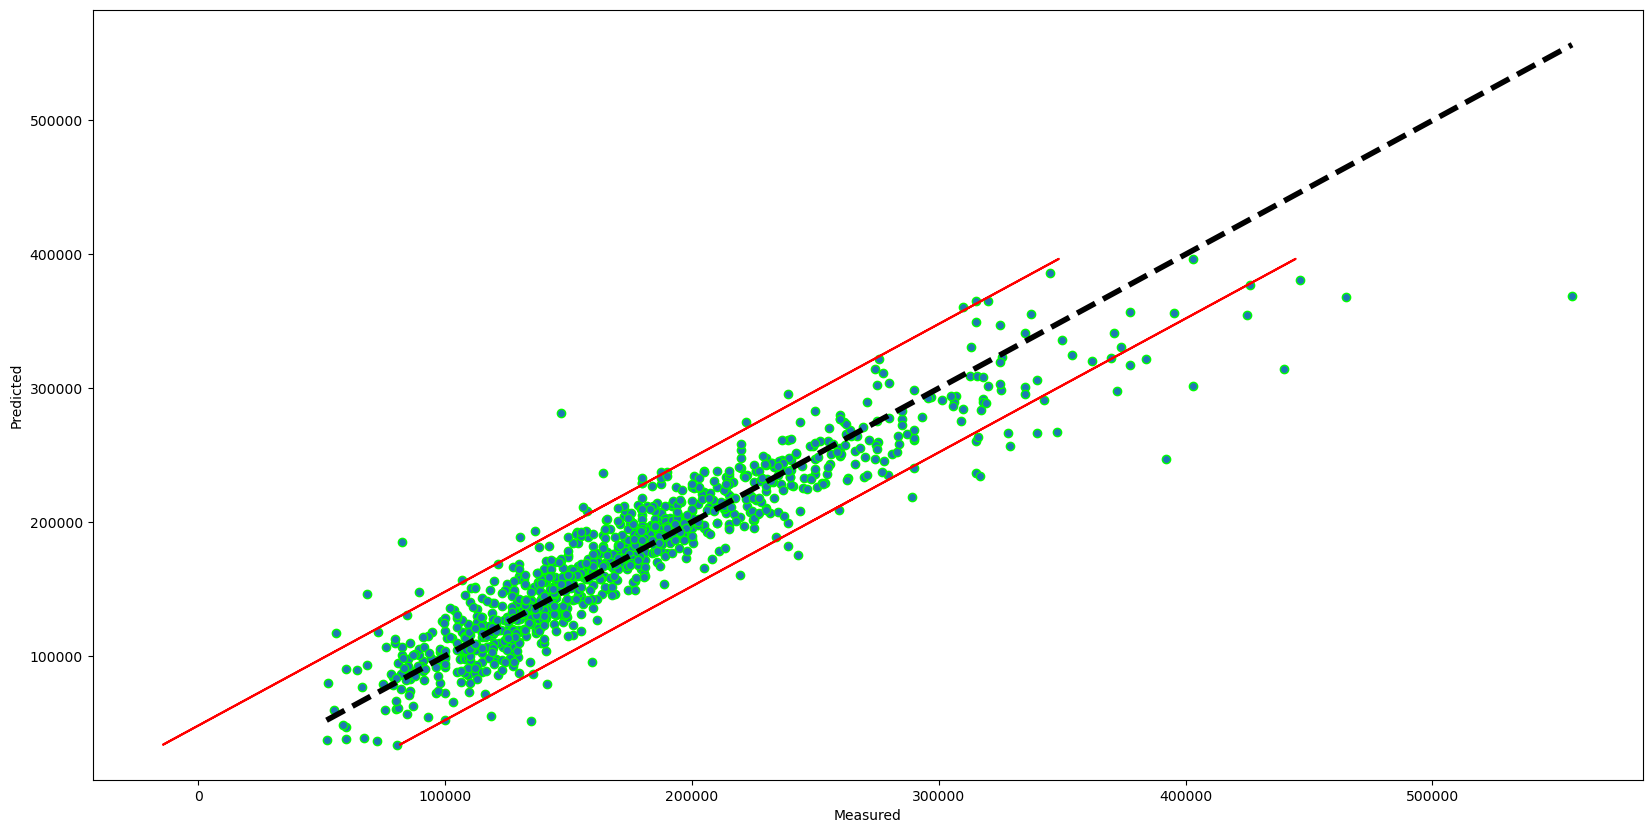

la valeur de RMSE : 24471.701063070817
La valeur de R2 :0.867154061158392


In [254]:
stdev = np.sqrt(sum((Prediction - Y)**2) / (len(Y)))
IH, IB =(Prediction - 1.96*stdev, Prediction + 1.96*stdev) #Intervalle de confiance de 96%

fig, ax = plt.subplots()
ax.scatter(Y, Prediction, edgecolors = (0,1,0))
ax.plot([Y.min(),Y.max()], [Y.min(),Y.max()], 'k--', lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
ax.plot(IH, Prediction, c='r')
ax.plot(IB, Prediction, c='r')
fig.set_size_inches(20, 10)
plt.show()
print("la valeur de RMSE : " + str(np.sqrt(((Prediction - Y) ** 2).mean())))
print("La valeur de R2 :" + str(1 - np.sum((Y-Prediction)**2) / np.sum((Y-np.mean(Y))**2)))  

## XGBoost

In [371]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

# Exemple de données (remplace X et Y par tes propres données)
# X, Y = tes données d'entraînement et de cible

# Initialiser KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser le modèle XGBoost
model_xgb = xgb.XGBRegressor()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_search.fit(X, Y)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (MSE) : ", -grid_search.best_score_)  # Le score est négatif, donc il faut l'inverser pour obtenir MSE
print('Meuiller RMSE : ', np.sqrt(-grid_search.best_score_))

# Sauvegarder le meilleur modèle
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_xgboost_model.pkl')

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Meilleur score (MSE) :  563274674.0411557
Meuiller RMSE :  23733.4083949431


['best_xgboost_model.pkl']

XGBoost nous a donné de meilleurs performances que la régression linéaire

# Données TEST

In [269]:
data_test = pd.read_csv("test.csv")
data_test 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [271]:
data_test = data_test.drop("Id", axis = 1)
data_test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4            HLS    AllPub    Inside  ...         144        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1455         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1456         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1457         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       6    2010        WD         Normal  
1           Gar2   12500       6    2010        WD         Normal  
2            NaN       0       3    2010        WD         Normal  
3            NaN       0       6    2010        WD         Normal  
4            NaN       0       1    2010        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
1454         NaN       0       6    2006        WD         Normal  
1455         NaN       0       4    2006        WD        Abnorml  
1456         NaN       0       9    2006        WD        Abnorml  
1457        Shed     700       7    2006        WD         Normal  
1458         NaN       0      11    2006        WD         Normal  

[1459 rows x 79 columns]

## Données test non numérique

In [272]:
data_test_non_num = data_non_numerique(data_test)
data_test_non_num

object     43
int64      25
float64    11
Name: count, dtype: int64


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1454       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0           NAmes      Feedr  ...     Attchd          Unf         TA   
1           NAmes       Norm  ...     Attchd          Unf         TA   
2         Gilbert       Norm  ...     Attchd          Fin         TA   
3         Gilbert       Norm  ...     Attchd          Fin         TA   
4         StoneBr       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1454      MeadowV       Norm  ...        NaN          NaN        NaN   
1455      MeadowV       Norm  ...    CarPort          Unf         TA   
1456      Mitchel       Norm  ...     Detchd          Unf         TA   
1457      Mitchel       Norm  ...        NaN          NaN        NaN   
1458      Mitchel       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN  MnPrv         NaN       WD        Normal  
1            TA          Y    NaN    NaN        Gar2       WD        Normal  
2            TA          Y    NaN  MnPrv         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD        Normal  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1454        NaN          Y    NaN    NaN         NaN       WD        Normal  
1455         TA          Y    NaN    NaN         NaN       WD       Abnorml  
1456         TA          Y    NaN    NaN         NaN       WD       Abnorml  
1457        NaN          Y    NaN  MnPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  

[1459 rows x 43 columns]

In [273]:
data_test_non_num.fillna(data_test_non_num.mode().iloc[0], inplace=True) #Replacer par la modalité le plus présent

In [319]:
data_test_non_num = label_encoder(data_test_non_num) #normalisation
data_test_non_num = standar_scaler(data_test_non_num) #standard scaler
data_test_non_num

MSZoning   Street     Alley  LotShape  LandContour  Utilities  \
0    -1.501777  0.06426 -0.161306  0.742620      0.31870        0.0   
1    -0.039098  0.06426 -0.161306 -1.384637      0.31870        0.0   
2    -0.039098  0.06426 -0.161306 -1.384637      0.31870        0.0   
3    -0.039098  0.06426 -0.161306 -1.384637      0.31870        0.0   
4    -0.039098  0.06426 -0.161306 -1.384637     -2.53396        0.0   
...        ...      ...       ...       ...          ...        ...   
1454  1.423581  0.06426 -0.161306  0.742620      0.31870        0.0   
1455  1.423581  0.06426 -0.161306  0.742620      0.31870        0.0   
1456 -0.039098  0.06426 -0.161306  0.742620      0.31870        0.0   
1457 -0.039098  0.06426 -0.161306  0.742620      0.31870        0.0   
1458 -0.039098  0.06426 -0.161306  0.742620      0.31870        0.0   

      LotConfig  LandSlope  Neighborhood  Condition1  ...  GarageType  \
0      0.572445  -0.207992     -0.105672   -1.193183  ...   -0.689701   
1     -1.950811  -0.207992     -0.105672   -0.056113  ...   -0.689701   
2      0.572445  -0.207992     -0.784114   -0.056113  ...   -0.689701   
3      0.572445  -0.207992     -0.784114   -0.056113  ...   -0.689701   
4      0.572445  -0.207992      1.590431   -0.056113  ...   -0.689701   
...         ...        ...           ...         ...  ...         ...   
1454   0.572445  -0.207992     -0.444893   -0.056113  ...   -0.689701   
1455   0.572445  -0.207992     -0.444893   -0.056113  ...    1.004363   
1456   0.572445  -0.207992     -0.275283   -0.056113  ...    1.569051   
1457   0.572445  -0.207992     -0.275283   -0.056113  ...   -0.689701   
1458   0.572445   4.389890     -0.275283   -0.056113  ...   -0.689701   

      GarageFinish  GarageQual  GarageCond  PavedDrive    PoolQC     Fence  \
0         0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
1         0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
2        -1.491575    0.250409    0.186902    0.339114 -0.026189  0.276775   
3        -1.491575    0.250409    0.186902    0.339114 -0.026189  0.276775   
4        -0.279203    0.250409    0.186902    0.339114 -0.026189  0.276775   
...            ...         ...         ...         ...       ...       ...   
1454      0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
1455      0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
1456      0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
1457      0.933169    0.250409    0.186902    0.339114 -0.026189  0.276775   
1458     -1.491575    0.250409    0.186902    0.339114 -0.026189  0.276775   

      MiscFeature  SaleType  SaleCondition  
0        0.056063   0.32475       0.201383  
1      -20.393078   0.32475       0.201383  
2        0.056063   0.32475       0.201383  
3        0.056063   0.32475       0.201383  
4        0.056063   0.32475       0.201383  
...           ...       ...            ...  
1454     0.056063   0.32475       0.201383  
1455     0.056063   0.32475      -3.589818  
1456     0.056063   0.32475      -3.589818  
1457     0.056063   0.32475       0.201383  
1458     0.056063   0.32475       0.201383  

[1459 rows x 43 columns]

## Data test numérique

In [353]:
data_test_num = data_numerique(data_test)
data_test_num 

object     43
int64      25
float64    11
Name: count, dtype: int64


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20         80.0    11622            5            6       1961   
1             20         81.0    14267            6            6       1958   
2             60         74.0    13830            5            5       1997   
3             60         78.0     9978            6            6       1998   
4            120         43.0     5005            8            5       1992   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0             1961         0.0       468.0       144.0  ...       730.0   
1             1958       108.0       923.0         0.0  ...       312.0   
2             1998         0.0       791.0         0.0  ...       482.0   
3             1998        20.0       602.0         0.0  ...       470.0   
4             1992         0.0       263.0         0.0  ...       506.0   
...            ...         ...         ...         ...  ...         ...   
1454          1970         0.0         0.0         0.0  ...         0.0   
1455          1970         0.0       252.0         0.0  ...       286.0   
1456          1996         0.0      1224.0         0.0  ...       576.0   
1457          1992         0.0       337.0         0.0  ...         0.0   
1458          1994        94.0       758.0         0.0  ...       650.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            140            0              0          0          120   
1            393           36              0          0            0   
2            212           34              0          0            0   
3            360           36              0          0            0   
4              0           82              0          0          144   
...          ...          ...            ...        ...          ...   
1454           0            0              0          0            0   
1455           0           24              0          0            0   
1456         474            0              0          0            0   
1457          80           32              0          0            0   
1458         190           48              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
0            0        0       6    2010  
1            0    12500       6    2010  
2            0        0       3    2010  
3            0        0       6    2010  
4            0        0       1    2010  
...        ...      ...     ...     ...  
1454         0        0       6    2006  
1455         0        0       4    2006  
1456         0        0       9    2006  
1457         0      700       7    2006  
1458         0        0      11    2006  

[1459 rows x 36 columns]

In [354]:
data_test_num = standar_scaler(data_test_num) #standard scaler
data_test_num

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0      -0.874711     0.510540  0.363929    -0.751101     0.400766  -0.340945   
1      -0.874711     0.555248  0.897861    -0.054877     0.400766  -0.439695   
2       0.061351     0.242297  0.809646    -0.751101    -0.497418   0.844059   
3       0.061351     0.421126  0.032064    -0.054877     0.400766   0.876976   
4       1.465443    -1.143626 -0.971808     1.337571    -0.497418   0.679475   
...          ...          ...       ...          ...          ...        ...   
1454    2.401505    -2.127185 -1.591330    -1.447325     1.298950  -0.044694   
1455    2.401505    -2.127185 -1.599808    -1.447325    -0.497418  -0.044694   
1456   -0.874711     4.087117  2.055150    -0.751101     1.298950  -0.373861   
1457    0.646389    -0.294189  0.125527    -0.751101    -0.497418   0.679475   
1458    0.061351     0.242297 -0.038790     0.641347    -0.497418   0.712392   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0        -1.072885   -0.567170    0.063273    0.517171  ...    1.185538   
1        -1.214908    0.041060    1.063027   -0.297800  ...   -0.740959   
2         0.678742   -0.567170    0.772989   -0.297800  ...    0.042545   
3         0.678742   -0.454535    0.357706   -0.297800  ...   -0.012761   
4         0.394694   -0.567170   -0.387166   -0.297800  ...    0.153157   
...            ...         ...         ...         ...  ...         ...   
1454     -0.646813   -0.567170   -0.965046   -0.297800  ...   -2.178918   
1455     -0.646813   -0.567170   -0.411336   -0.297800  ...   -0.860788   
1456      0.584059   -0.567170    1.724403   -0.297800  ...    0.475776   
1457      0.394694   -0.567170   -0.224568   -0.297800  ...   -2.178918   
1458      0.489377   -0.037784    0.700479   -0.297800  ...    0.816831   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       0.366678    -0.701628      -0.360738  -0.088827     1.818960   
1       2.347867    -0.178826      -0.360738  -0.088827    -0.301543   
2       0.930495    -0.207871      -0.360738  -0.088827    -0.301543   
3       2.089451    -0.178826      -0.360738  -0.088827    -0.301543   
4      -0.729632     0.489198      -0.360738  -0.088827     2.243060   
...          ...          ...            ...        ...          ...   
1454   -0.729632    -0.701628      -0.360738  -0.088827    -0.301543   
1455   -0.729632    -0.353093      -0.360738  -0.088827    -0.301543   
1456    2.982161    -0.701628      -0.360738  -0.088827    -0.301543   
1457   -0.103169    -0.236915      -0.360738  -0.088827    -0.301543   
1458    0.758218    -0.004559      -0.360738  -0.088827    -0.301543   

      PoolArea    MiscVal    MoSold    YrSold  
0    -0.057227  -0.092244 -0.038281  1.713905  
1    -0.057227  19.730438 -0.038281  1.713905  
2    -0.057227  -0.092244 -1.140614  1.713905  
3    -0.057227  -0.092244 -0.038281  1.713905  
4    -0.057227  -0.092244 -1.875504  1.713905  
...        ...        ...       ...       ...  
1454 -0.057227  -0.092244 -0.038281 -1.359958  
1455 -0.057227  -0.092244 -0.773170 -1.359958  
1456 -0.057227  -0.092244  1.064053 -1.359958  
1457 -0.057227   1.017827  0.329164 -1.359958  
1458 -0.057227  -0.092244  1.798942 -1.359958  

[1459 rows x 36 columns]

In [372]:
X_test = data_test_num.join(data_test_non_num,  how='inner') # 'outer' pour garder tous les indices, 'inner' pour garder les indices communs
X_test = Data_final_test[Data_modelisation.columns[:-1]] #On enleve saleprice du train
X_test

GarageCond  GarageType  GarageFinish  GarageQual  BsmtExposure  \
0       0.186902   -0.689701      0.933169    0.250409      0.620425   
1       0.186902   -0.689701      0.933169    0.250409      0.620425   
2       0.186902   -0.689701     -1.491575    0.250409      0.620425   
3       0.186902   -0.689701     -1.491575    0.250409      0.620425   
4       0.186902   -0.689701     -0.279203    0.250409      0.620425   
...          ...         ...           ...         ...           ...   
1454    0.186902   -0.689701      0.933169    0.250409      0.620425   
1455    0.186902    1.004363      0.933169    0.250409      0.620425   
1456    0.186902    1.569051      0.933169    0.250409      0.620425   
1457    0.186902   -0.689701      0.933169    0.250409     -2.095175   
1458    0.186902   -0.689701     -1.491575    0.250409     -2.095175   

      BsmtFinType2  BsmtCond  BsmtQual  BsmtFinType1  Electrical  ...  \
0        -1.578965  0.290347  0.839283      0.696701    0.296079  ...   
1         0.324927  0.290347  0.839283     -1.557149    0.296079  ...   
2         0.324927  0.290347 -0.265874     -0.430224    0.296079  ...   
3         0.324927  0.290347  0.839283     -0.430224    0.296079  ...   
4         0.324927  0.290347 -0.265874     -1.557149    0.296079  ...   
...            ...       ...       ...           ...         ...  ...   
1454      0.324927  0.290347  0.839283      1.260163    0.296079  ...   
1455      0.324927  0.290347  0.839283      0.696701    0.296079  ...   
1456      0.324927  0.290347  0.839283     -1.557149    0.296079  ...   
1457      0.324927  0.290347 -0.265874     -0.430224    0.296079  ...   
1458      0.324927  0.290347 -0.265874      0.133238    0.296079  ...   

      YearRemodAdd  Fireplaces   LotArea  BsmtFinSF1  MasVnrArea  OpenPorchSF  \
0        -1.072885   -0.898055  0.363929    0.063273   -0.567170    -0.701628   
1        -1.214908   -0.898055  0.897861    1.063027    0.041060    -0.178826   
2         0.678742    0.647066  0.809646    0.772989   -0.567170    -0.207871   
3         0.678742    0.647066  0.032064    0.357706   -0.454535    -0.178826   
4         0.394694   -0.898055 -0.971808   -0.387166   -0.567170     0.489198   
...            ...         ...       ...         ...         ...          ...   
1454     -0.646813   -0.898055 -1.591330   -0.965046   -0.567170    -0.701628   
1455     -0.646813   -0.898055 -1.599808   -0.411336   -0.567170    -0.353093   
1456      0.584059    0.647066  2.055150    1.724403   -0.567170    -0.701628   
1457      0.394694   -0.898055  0.125527   -0.224568   -0.567170    -0.236915   
1458      0.489377    0.647066 -0.038790    0.700479   -0.037784    -0.004559   

      WoodDeckSF  KitchenAbvGr  BsmtHalfBath  PoolArea  
0       0.366678      -0.20391     -0.258349 -0.057227  
1       2.347867      -0.20391     -0.258349 -0.057227  
2       0.930495      -0.20391     -0.258349 -0.057227  
3       2.089451      -0.20391     -0.258349 -0.057227  
4      -0.729632      -0.20391     -0.258349 -0.057227  
...          ...           ...           ...       ...  
1454   -0.729632      -0.20391     -0.258349 -0.057227  
1455   -0.729632      -0.20391     -0.258349 -0.057227  
1456    2.982161      -0.20391     -0.258349 -0.057227  
1457   -0.103169      -0.20391      3.703905 -0.057227  
1458    0.758218      -0.20391     -0.258349 -0.057227  

[1459 rows x 55 columns]

In [373]:
# Charger le modèle sauvegardé
best_model = joblib.load('best_xgboost_model.pkl')

# Entraîner le modèle sur le jeu de test
y_pred = best_model.predict(X_test)
y_pred

array([131168.1 , 152777.11, 143432.27, ..., 168778.58, 122070.15,
       180177.14], dtype=float32)

In [374]:
sub = pd.read_csv("sample_submission.csv")
sub 

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

In [375]:
sub["SalePrice"] = y_pred
sub

Id      SalePrice
0     1461  131168.093750
1     1462  152777.109375
2     1463  143432.265625
3     1464  156243.421875
4     1465  161836.812500
...    ...            ...
1454  2915   86982.648438
1455  2916   89921.875000
1456  2917  168778.578125
1457  2918  122070.148438
1458  2919  180177.140625

[1459 rows x 2 columns]

In [376]:
sub.to_csv("fichier_soumission_LGBM.csv", index = False)

 # Kaggle

In [387]:
# Ouvrir l'image PNG
im = Image.open('submit_xgboost.PNG')

# Convertir l'image en mode RGB si nécessaire
if im.mode == 'RGBA':
    im = im.convert('RGB')

# Sauvegarder l'image au format JPEG
im.save('submit_xgboost.jpg', 'JPEG')

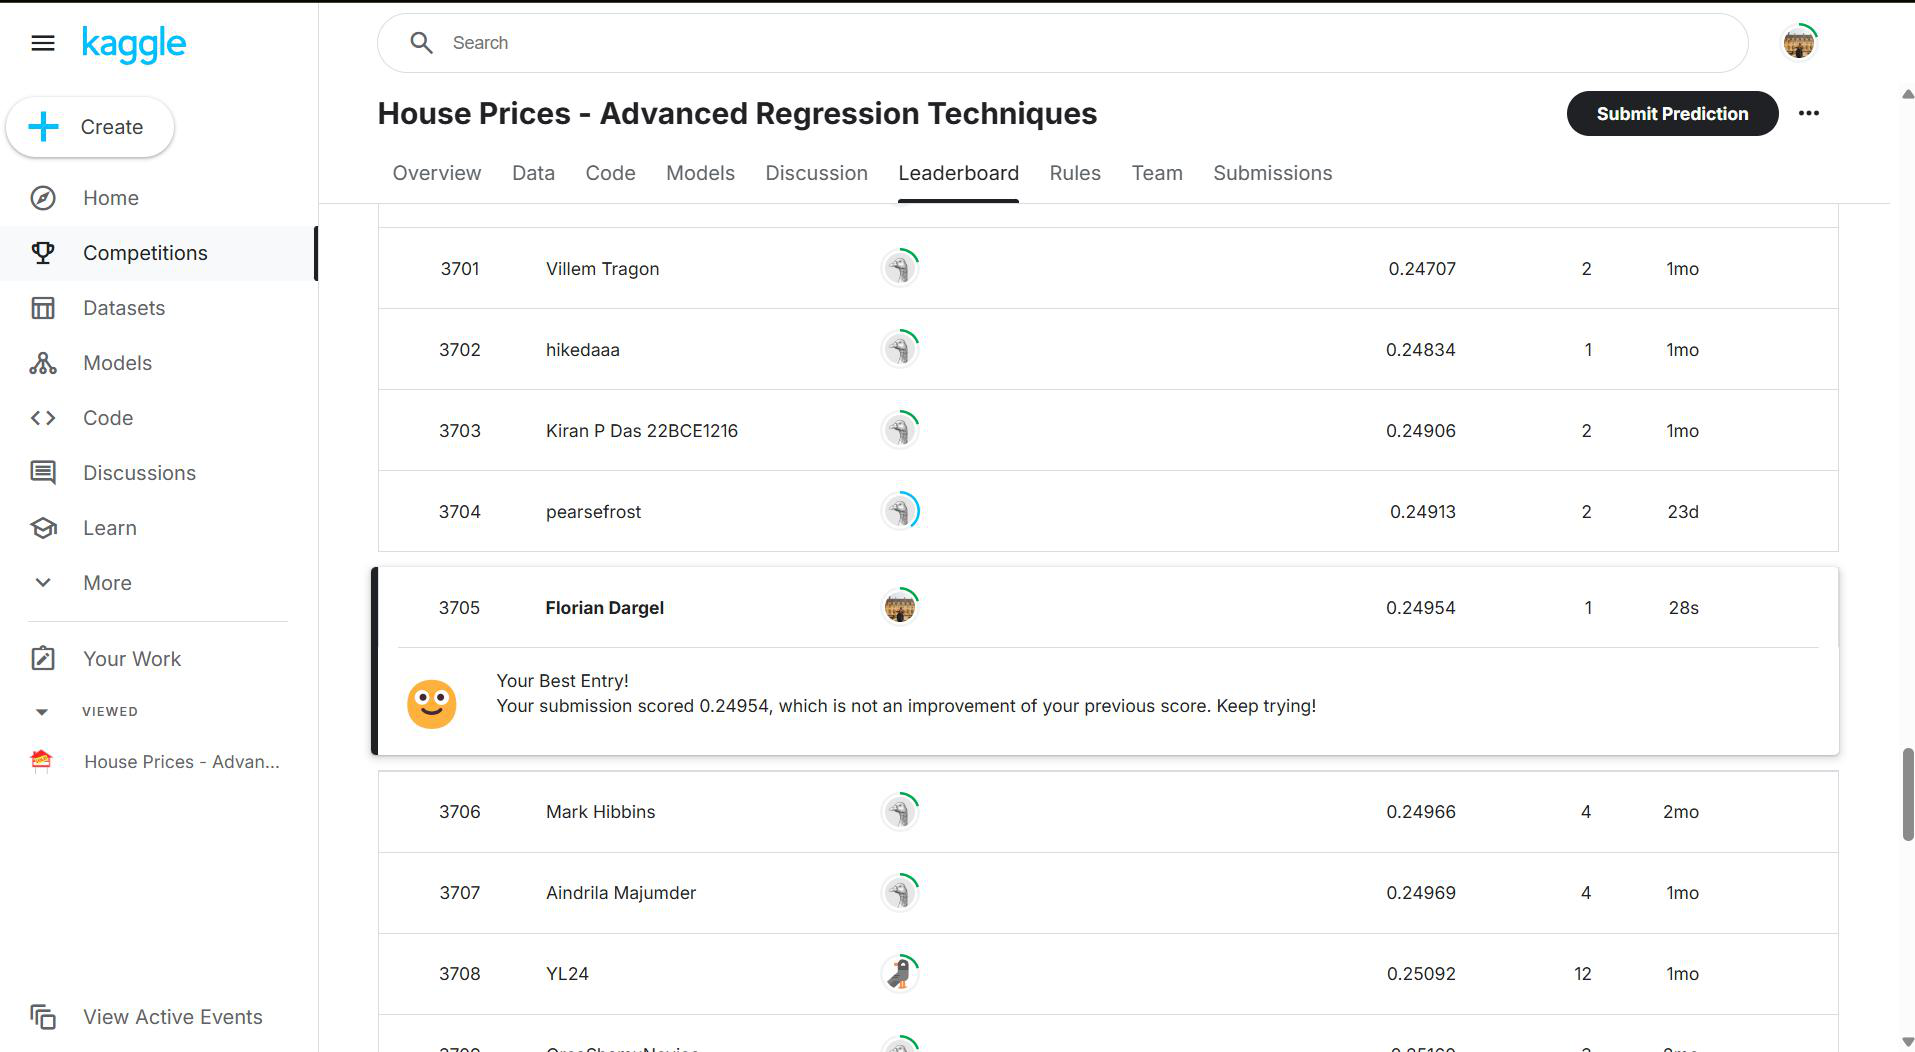

In [388]:
from PIL import Image
im = Image.open('submit_xgboost.jpg')
im

# SHAP : Interprétation de l'algorithme XGBoost

In [405]:
import shap

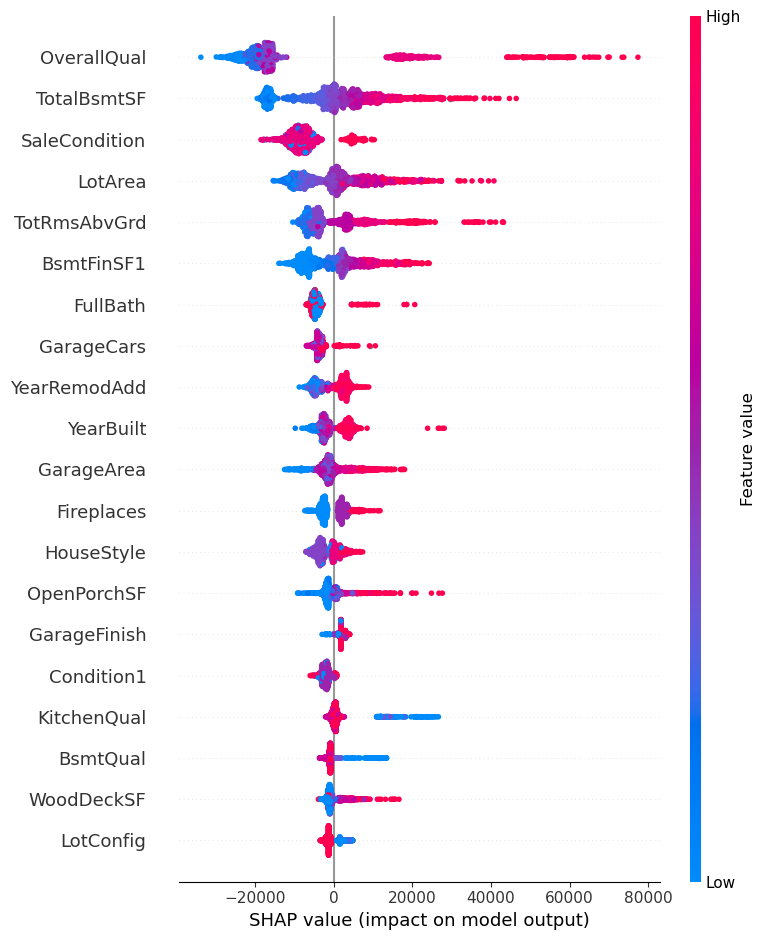

In [406]:
# Créer un explaineur SHAP pour le modèle
explainer = shap.TreeExplainer(best_model)
# Calculer les valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test)
# Visualiser les valeurs SHAP pour une instance spécifique
shap.initjs()  # Initialiser le visualiseur JS
shap.summary_plot(shap_values, X_test)

L'image montre un graphique de dépendance SHAP (SHapley Additive exPlanations) qui est couramment utilisé pour interpréter l'importance des variables dans un modèle de machine learning. Chaque point sur la ligne représente une instance de la variable, et la position du point sur l'axe horizontal montre l'impact que cette variable a sur la prédiction pour une maison donnée.

    Explication générale du graphique SHAP :
    Axe horizontal (SHAP value) : Représente l'impact de la variable sur la prédiction du modèle. Si le point est à droite de 0, cela signifie que cette caractéristique augmente la prédiction du prix (dans ce cas, le prix de la maison). Si le point est à gauche de 0, cela signifie que cette caractéristique diminue la prédiction du prix de la maison.

    Couleur : Chaque point est coloré en fonction de la valeur de la caractéristique correspondante. Une couleur bleue représente une valeur faible de la caractéristique, tandis que la couleur rouge représente une valeur élevée.

    Les variables les plus importantes : En haut du graphique, les caractéristiques sont triées par ordre d'importance décroissant. Les caractéristiques les plus importantes (en termes d'impact global sur les prédictions) sont en haut, et les moins importantes en bas.
    
OverallQual est une caractéristique cruciale dans ce modèle : une maison avec une qualité globale élevée (valeur élevée pour OverallQual, représentée en rouge) augmente le prix de vente prédictif, tandis qu'une maison de qualité plus faible (valeur faible, en bleu) diminue ce prix.

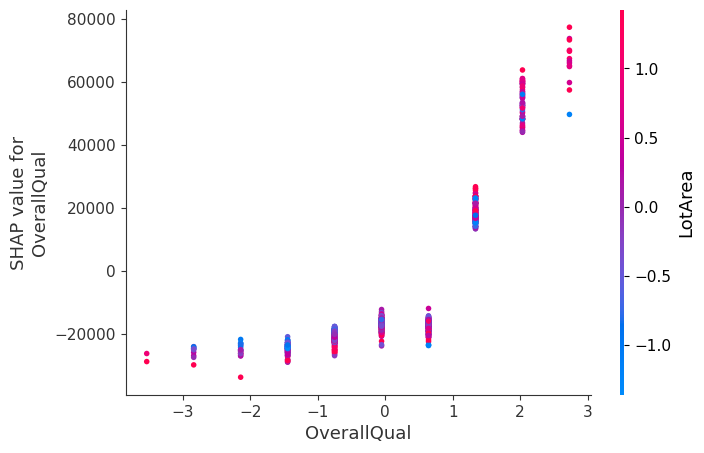

In [412]:
# Visualiser les dépendances d'une caractéristique spécifique
shap.dependence_plot("OverallQual", shap_values, X_test)

In [414]:
# Visualiser les valeurs SHAP pour une instance spécifique
instance_index = 0  # Choisir une instance spécifique de test
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])

In [413]:
# Visualiser les valeurs SHAP pour des prédictions individuelles
shap.initjs()  #On initialise le visualiseur JS
shap.force_plot(explainer.expected_value, shap_values, X_test)